<a href="https://colab.research.google.com/github/JoudySaleh-IT/IT326/blob/main/phase3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Loading** **Data**

In [ ]:
import pandas as pd
from scipy import stats
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
import matplotlib.pyplot as plt
from sklearn import tree
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans
from yellowbrick.cluster import SilhouetteVisualizer
from sklearn.metrics import silhouette_score




data = pd.read_csv('Processed_dataset.csv');
print(data)

      age  sex  cp  trestbps      chol  fbs  restecg   thalach  exang  \
0       1    1   0         1  0.196347    0        1  0.740458      0   
1       1    1   0         1  0.175799    1        0  0.641221      1   
2       2    1   0         2  0.109589    0        1  0.412214      1   
3       2    1   0         2  0.175799    0        1  0.687023      0   
4       2    0   0         1  0.383562    1        1  0.267176      0   
...   ...  ...  ..       ...       ...  ...      ...       ...    ...   
1020    1    1   1         1  0.216895    0        1  0.709924      1   
1021    1    1   0         1  0.301370    0        0  0.534351      1   
1022    1    1   0         0  0.340183    0        0  0.358779      1   
1023    1    0   0         0  0.292237    0        0  0.671756      0   
1024    1    1   0         0  0.141553    0        1  0.320611      0   

       oldpeak  slope  ca  thal  target  
0     0.161290      2   2     3       0  
1     0.500000      0   0     3       0

**Classification**

**Feature Selection**

chooses the variables (features) to be utilized in training, which are kept in the variable "X," as well as the variable from the dataset that has the right classifications (class labels), which is kept in the variable "y."

In [ ]:
fn= data.keys().tolist()[:-1]
X= data[fn]
y=data['target']
print(X)

      age  sex  cp  trestbps      chol  fbs  restecg   thalach  exang  \
0       1    1   0         1  0.196347    0        1  0.740458      0   
1       1    1   0         1  0.175799    1        0  0.641221      1   
2       2    1   0         2  0.109589    0        1  0.412214      1   
3       2    1   0         2  0.175799    0        1  0.687023      0   
4       2    0   0         1  0.383562    1        1  0.267176      0   
...   ...  ...  ..       ...       ...  ...      ...       ...    ...   
1020    1    1   1         1  0.216895    0        1  0.709924      1   
1021    1    1   0         1  0.301370    0        0  0.534351      1   
1022    1    1   0         0  0.340183    0        0  0.358779      1   
1023    1    0   0         0  0.292237    0        0  0.671756      0   
1024    1    1   0         0  0.141553    0        1  0.320611      0   

       oldpeak  slope  ca  thal  
0     0.161290      2   2     3  
1     0.500000      0   0     3  
2     0.419355      0

**1.Information Gain (Entropy):**

Splitting Data into 70% Training and 30% Test:

In [ ]:
from sklearn.tree import DecisionTreeClassifier
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

clf = DecisionTreeClassifier(criterion='entropy')

clf = clf. fit (X_train, y_train)

y_pred = clf.predict (X_test)

Confusion matrix:

[[157   4]
 [  3 144]]
0(Not HeartDisease) 1(HeartDisease)


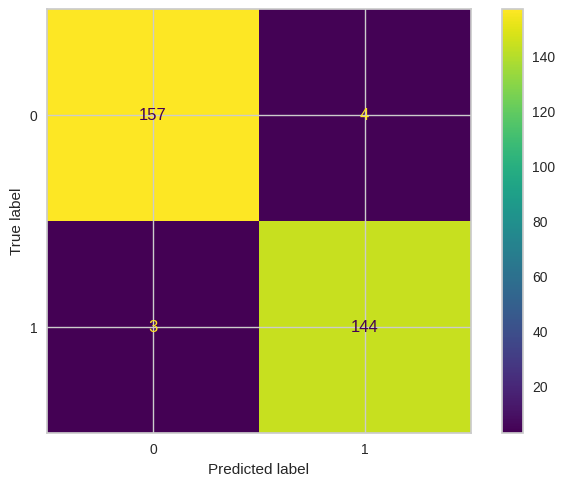

In [ ]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
#compute and print the confusion matrix
cm =cm = confusion_matrix(y_test, y_pred)
print(cm)

from sklearn.metrics import ConfusionMatrixDisplay
cn = data['target'].unique()

#create a confusion matrix display object
disp = ConfusionMatrixDisplay.from_estimator(clf , X_test , y_test , display_labels=cn)

print('0(Not HeartDisease) 1(HeartDisease)')

The confusion matrix represents the performance measurement of the classification model. In this case, we have a 2x2 confusion matrix where each row represents the actual classification, and each column represents the predicted classification. From the results, it appears:
* **Top-Left (TN)** = 157Correctly predicted as "Not HeartDisease" when the actual label was "Not HeartDisease."
* **Top-Right (FN)** = 4Incorrectly predicted as "HeartDisease" when the actual label was "Not HeartDisease."
* **Bottom-Left (FP**) = 3Incorrectly predicted as "Not HeartDisease" when the actual label was "HeartDisease."
* **Bottom-Right (TP)** = 144Correctly predicted as "HeartDisease" when the actual label was "HeartDisease."

Insight:
The model Correctly identified **157** cases of **Not HeartDisease** and **144** cases of **HeartDisease**.Incorrectly classified **4** cases of **Not HeartDisease as HeartDisease**.Incorrectly classified **3** cases of **HeartDisease as Not HeartDisease.**


Decision Tree:

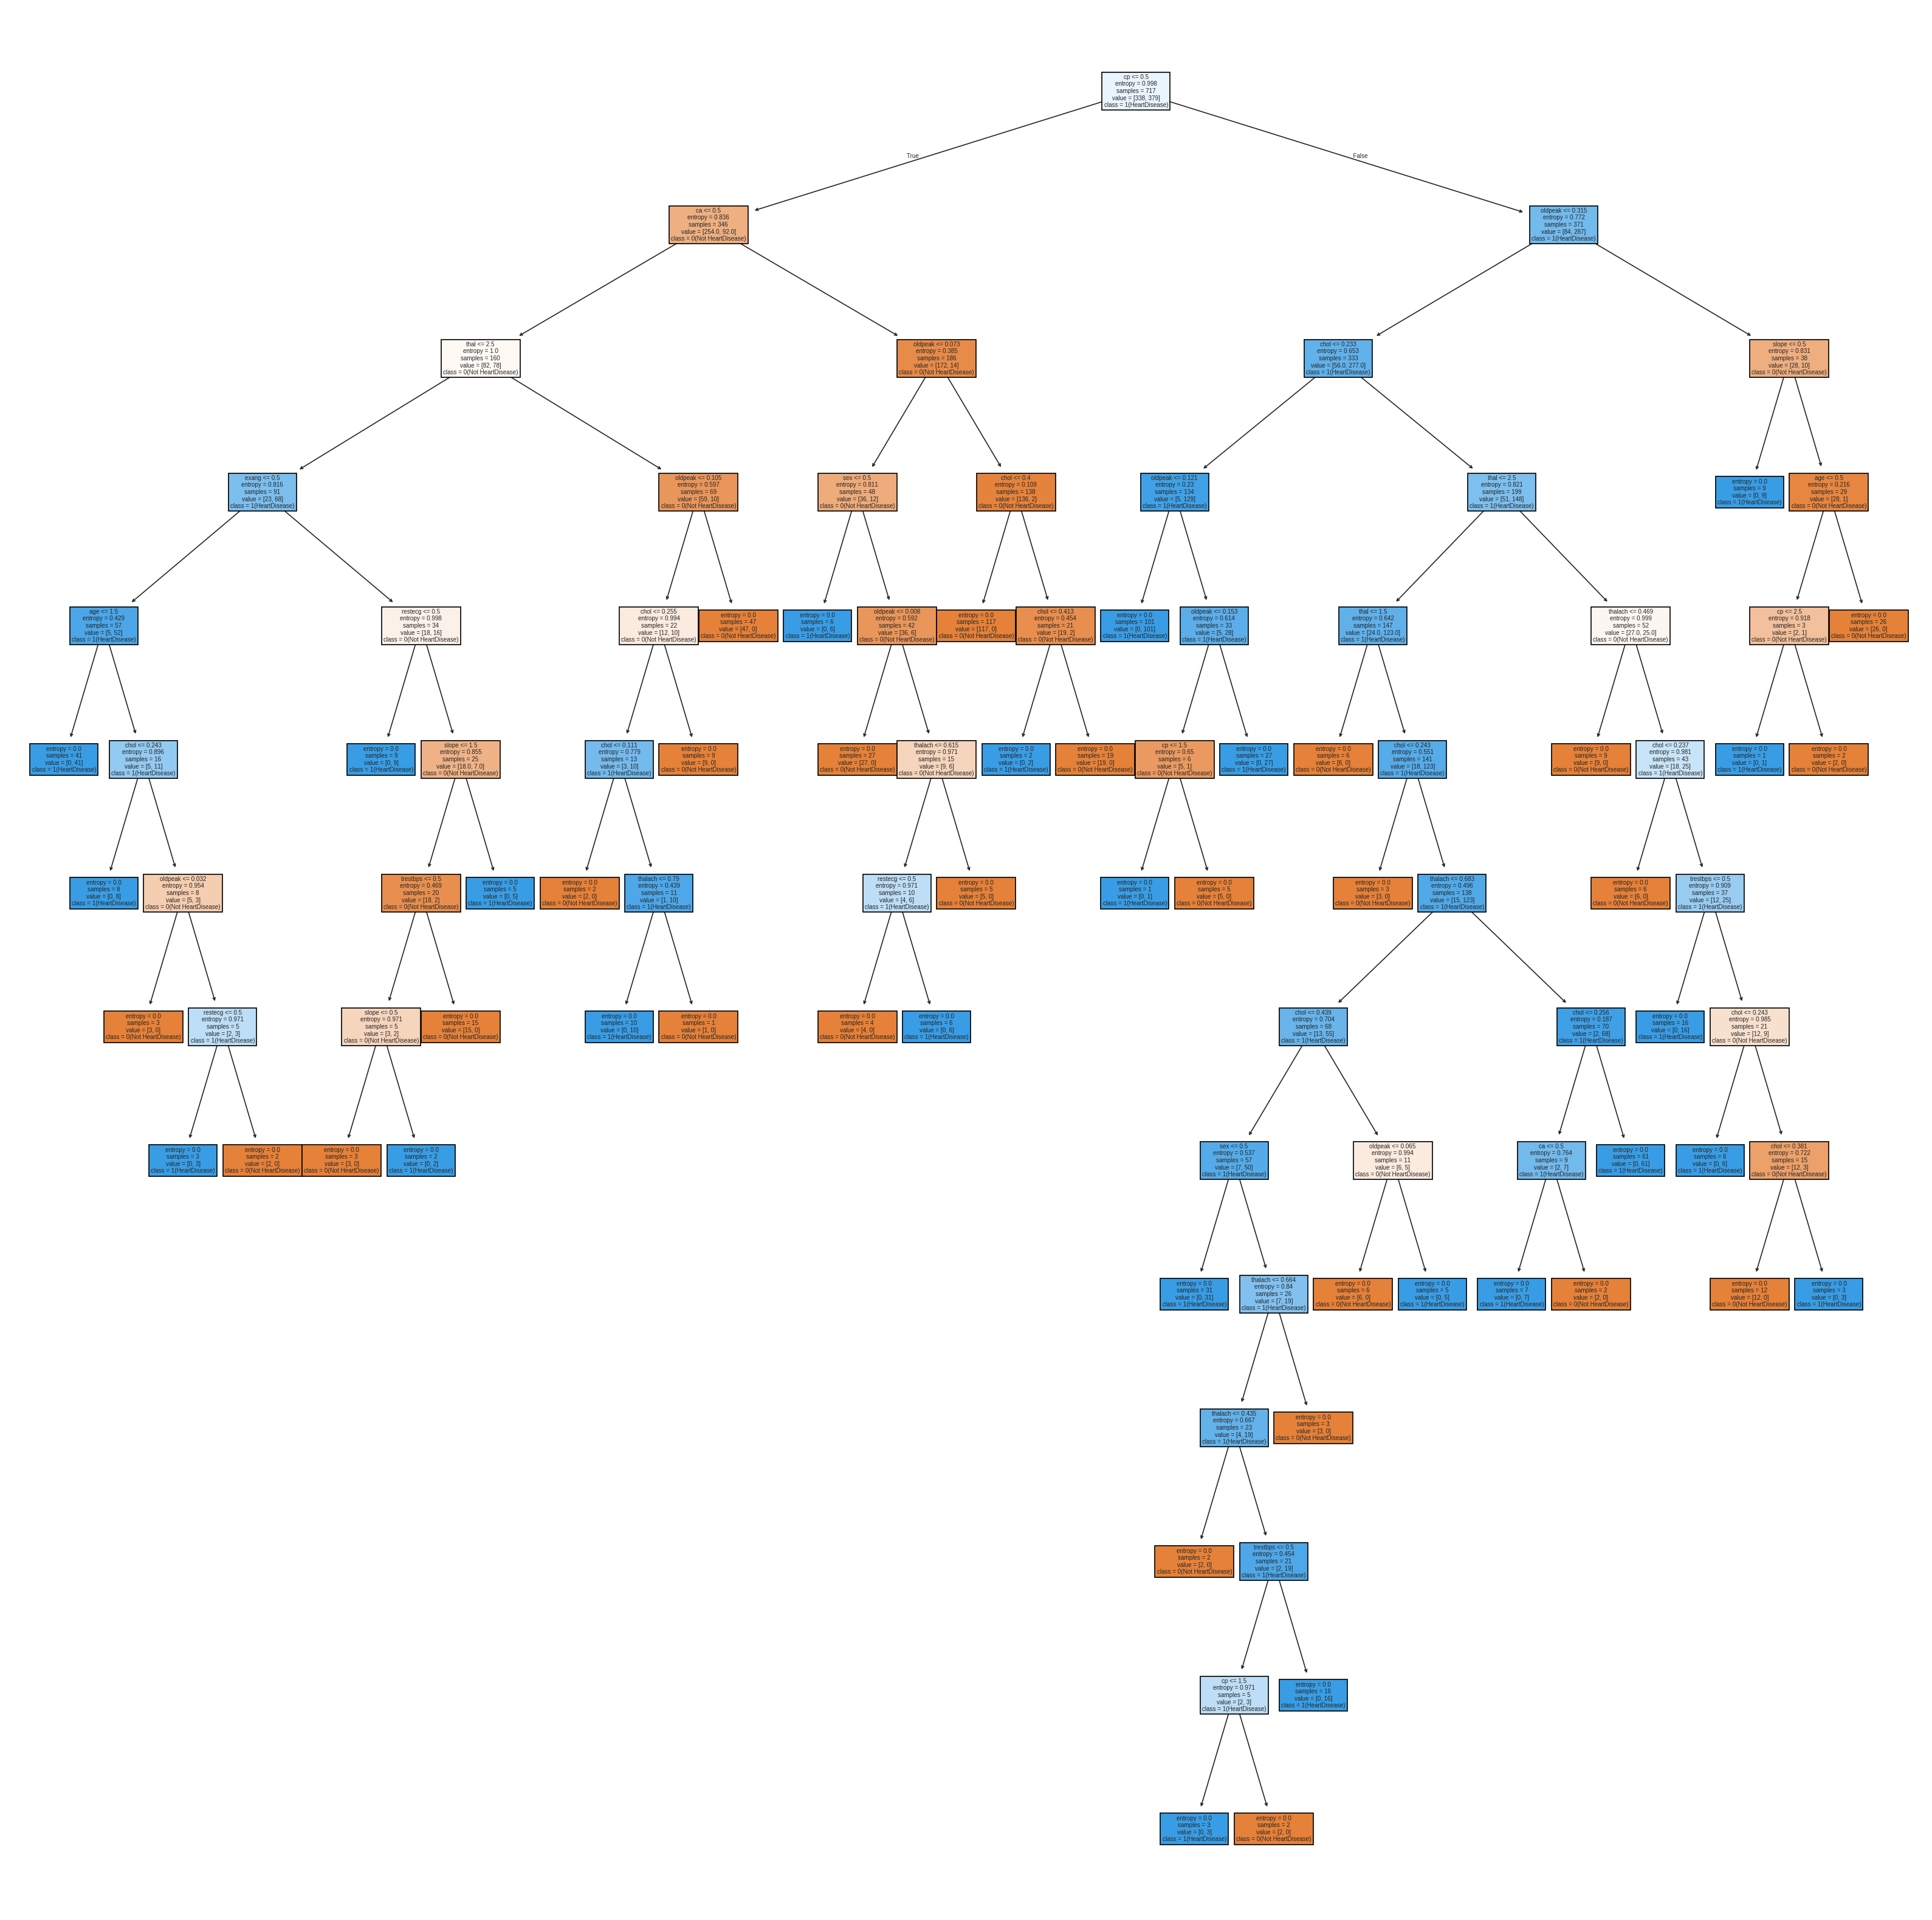

In [ ]:
fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(10, 10), dpi=400)


class_labels = {0: '0(Not HeartDisease)' , 1:'1(HeartDisease)'}

tree.plot_tree(clf,
               feature_names=fn,
               class_names=[class_labels[0], class_labels[1]],
               filled=True
               )

plt.show()

 **Decision Tree Analysis**  

This decision tree displays a hierarchical classification process where nodes split based on selected attributes to optimize prediction accuracy. Each node represents a decision point that utilizes a feature from the dataset, chosen based on its ability to enhance separation between classes by reducing uncertainty (impurity).  

- **Initial Split:**  
  The root node at the top represents the feature with the highest discriminative power. This feature is selected to best divide the dataset, maximizing information gain or minimizing impurity. The root feature in this model plays a significant role in predicting whether a patient has heart disease or not.  

- **Intermediate Nodes:**  
  As we move down the tree, additional splits occur on various features, further partitioning the data into smaller subsets, leading to more refined classifications. Each split is determined by a threshold that optimizes the classification process. The features used at these levels likely include key medical indicators such as cholesterol levels, blood pressure, or age, which are crucial for heart disease diagnosis.  

- **Branching Pathways:**  
  Each pathway from a parent node to a child node represents a decision based on the feature at that node, effectively creating a path that defines a unique set of conditions. These pathways help in narrowing down the classification, ensuring that each sample follows a logical route based on its feature values.  

- **Leaf Nodes:**  
  At the end of each branch, a leaf node provides a final classification based on the conditions met along the path. These terminal nodes represent the final prediction: either **"Heart Disease"** or **"Not Heart Disease."** Each pathway to a leaf node corresponds to a unique combination of feature values, guiding the prediction based on the model's learned patterns.  

This tree structure helps visualize how different medical factors contribute to predicting heart disease, offering an interpretable way to understand the model’s decision-making process.  

**model evaluation and selection**

In [ ]:
from sklearn import metrics
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Compute and print the confusion matrix
cm = confusion_matrix(y_test, y_pred)
print("confusion matrix : \n",cm)

# Compute Accuracy
accuracy = metrics.accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Error Rate is simply 1 minus the Accuracy
error_rate = 1 - accuracy
print("Error Rate:", error_rate)

# Sensitivity (Recall) and Specificity  require TN, FP, FN, TP :

TP = cm[1, 1]
TN = cm[0, 0]
FP = cm[0, 1]
FN = cm[1, 0]

# Sensitivity (Recall )
sensitivity = TP / (TP + FN)
print("Sensitivity:", sensitivity)

# Specificity
specificity = TN / (TN + FP)
print("Specificity:", specificity)

# Precision
precision = TP / (TP + FP)
print("Precision:", precision)

confusion matrix : 
 [[157   4]
 [  3 144]]
Accuracy: 0.9772727272727273
Error Rate: 0.022727272727272707
Sensitivity: 0.9795918367346939
Specificity: 0.9751552795031055
Precision: 0.972972972972973


### **Performance Metrics**
- **Accuracy:** This metric measures the proportion of correct predictions among all predictions. Here, the model's accuracy is approximately **97.73%**, meaning it correctly classifies about **97.73%** of instances.

- **Error Rate:** This represents the proportion of incorrect predictions out of all predictions. The error rate for this model is around **2.27%**.

- **Sensitivity (Recall):** This indicates the proportion of actual positive cases (heart disease) that the model correctly identifies. In this case, the sensitivity is approximately **97.96%**.

- **Specificity:** This measures the proportion of actual negative cases (no heart disease) that the model correctly identifies, which is around **97.52%**.

- **Precision:** This reflects the proportion of positive predictions that are actually correct. Here, the precision is about **97.30%**.



### **Outcomes:**
- The model's **accuracy of 97.73%** demonstrates a high level of correct predictions overall.
- The **sensitivity (97.96%)** indicates that the model has an excellent ability to identify cases of heart disease.
- **Specificity, at 97.52%,** reflects the model’s competence in correctly classifying negative cases (no heart disease).
- **Precision at 97.30%** highlights the accuracy of positive predictions, suggesting that most positive predictions made by the model are correct.


Splitting Data into 60% Training and 40% Test:

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=1)

clf2 = DecisionTreeClassifier(criterion='entropy')

clf2 = clf2.fit(X_train, y_train)

y_pred = clf2.predict(X_test)

Confusion matrix:

[[205   8]
 [  6 191]]
0(Not HeartDisease) 1(HeartDisease)


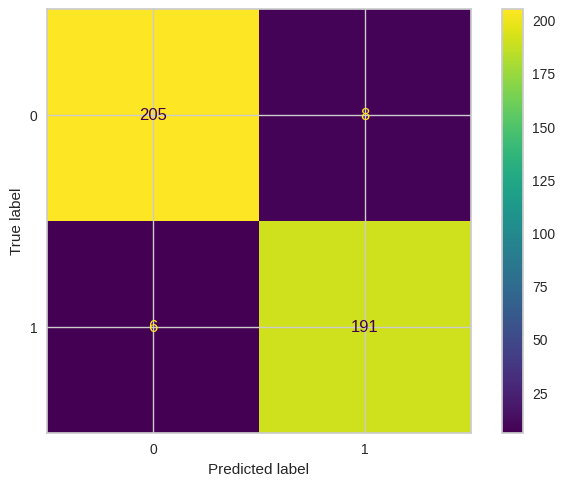

In [ ]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
#compute and print the confusion matrix
cm2 = confusion_matrix(y_test, y_pred)
print(cm2)

from sklearn.metrics import ConfusionMatrixDisplay
cn2 = data['target'].unique()

#create a confusion matrix display object
disp = ConfusionMatrixDisplay.from_estimator(clf2 , X_test , y_test , display_labels=cn2)

print('0(Not HeartDisease) 1(HeartDisease)')

The confusion matrix represents the performance measurement of the classification model. In this case, we have a 2x2 confusion matrix where each row represents the actual classification, and each column represents the predicted classification. From the results, it appears:

**Top-Left (TN)** = 205 Correctly predicted as "Not HeartDisease" when the actual label was "Not HeartDisease."

**Top-Right (FP)** = 8 Incorrectly predicted as "HeartDisease" when the actual label was "Not HeartDisease."

**Bottom-Left (FN)** = 3 Incorrectly predicted as "Not HeartDisease" when the actual label was "HeartDisease."

**Bottom-Right (TP)** = 194 Correctly predicted as "HeartDisease" when the actual label was "HeartDisease."

Insight:
The model
* Correctly identified 194 cases of HeartDisease and 205 cases of Not HeartDisease.
* Incorrectly classified 3 cases of HeartDisease as Not HeartDisease.
* Incorrectly classified 8 cases of Not HeartDisease as HeartDisease.

Dessicion Tree:

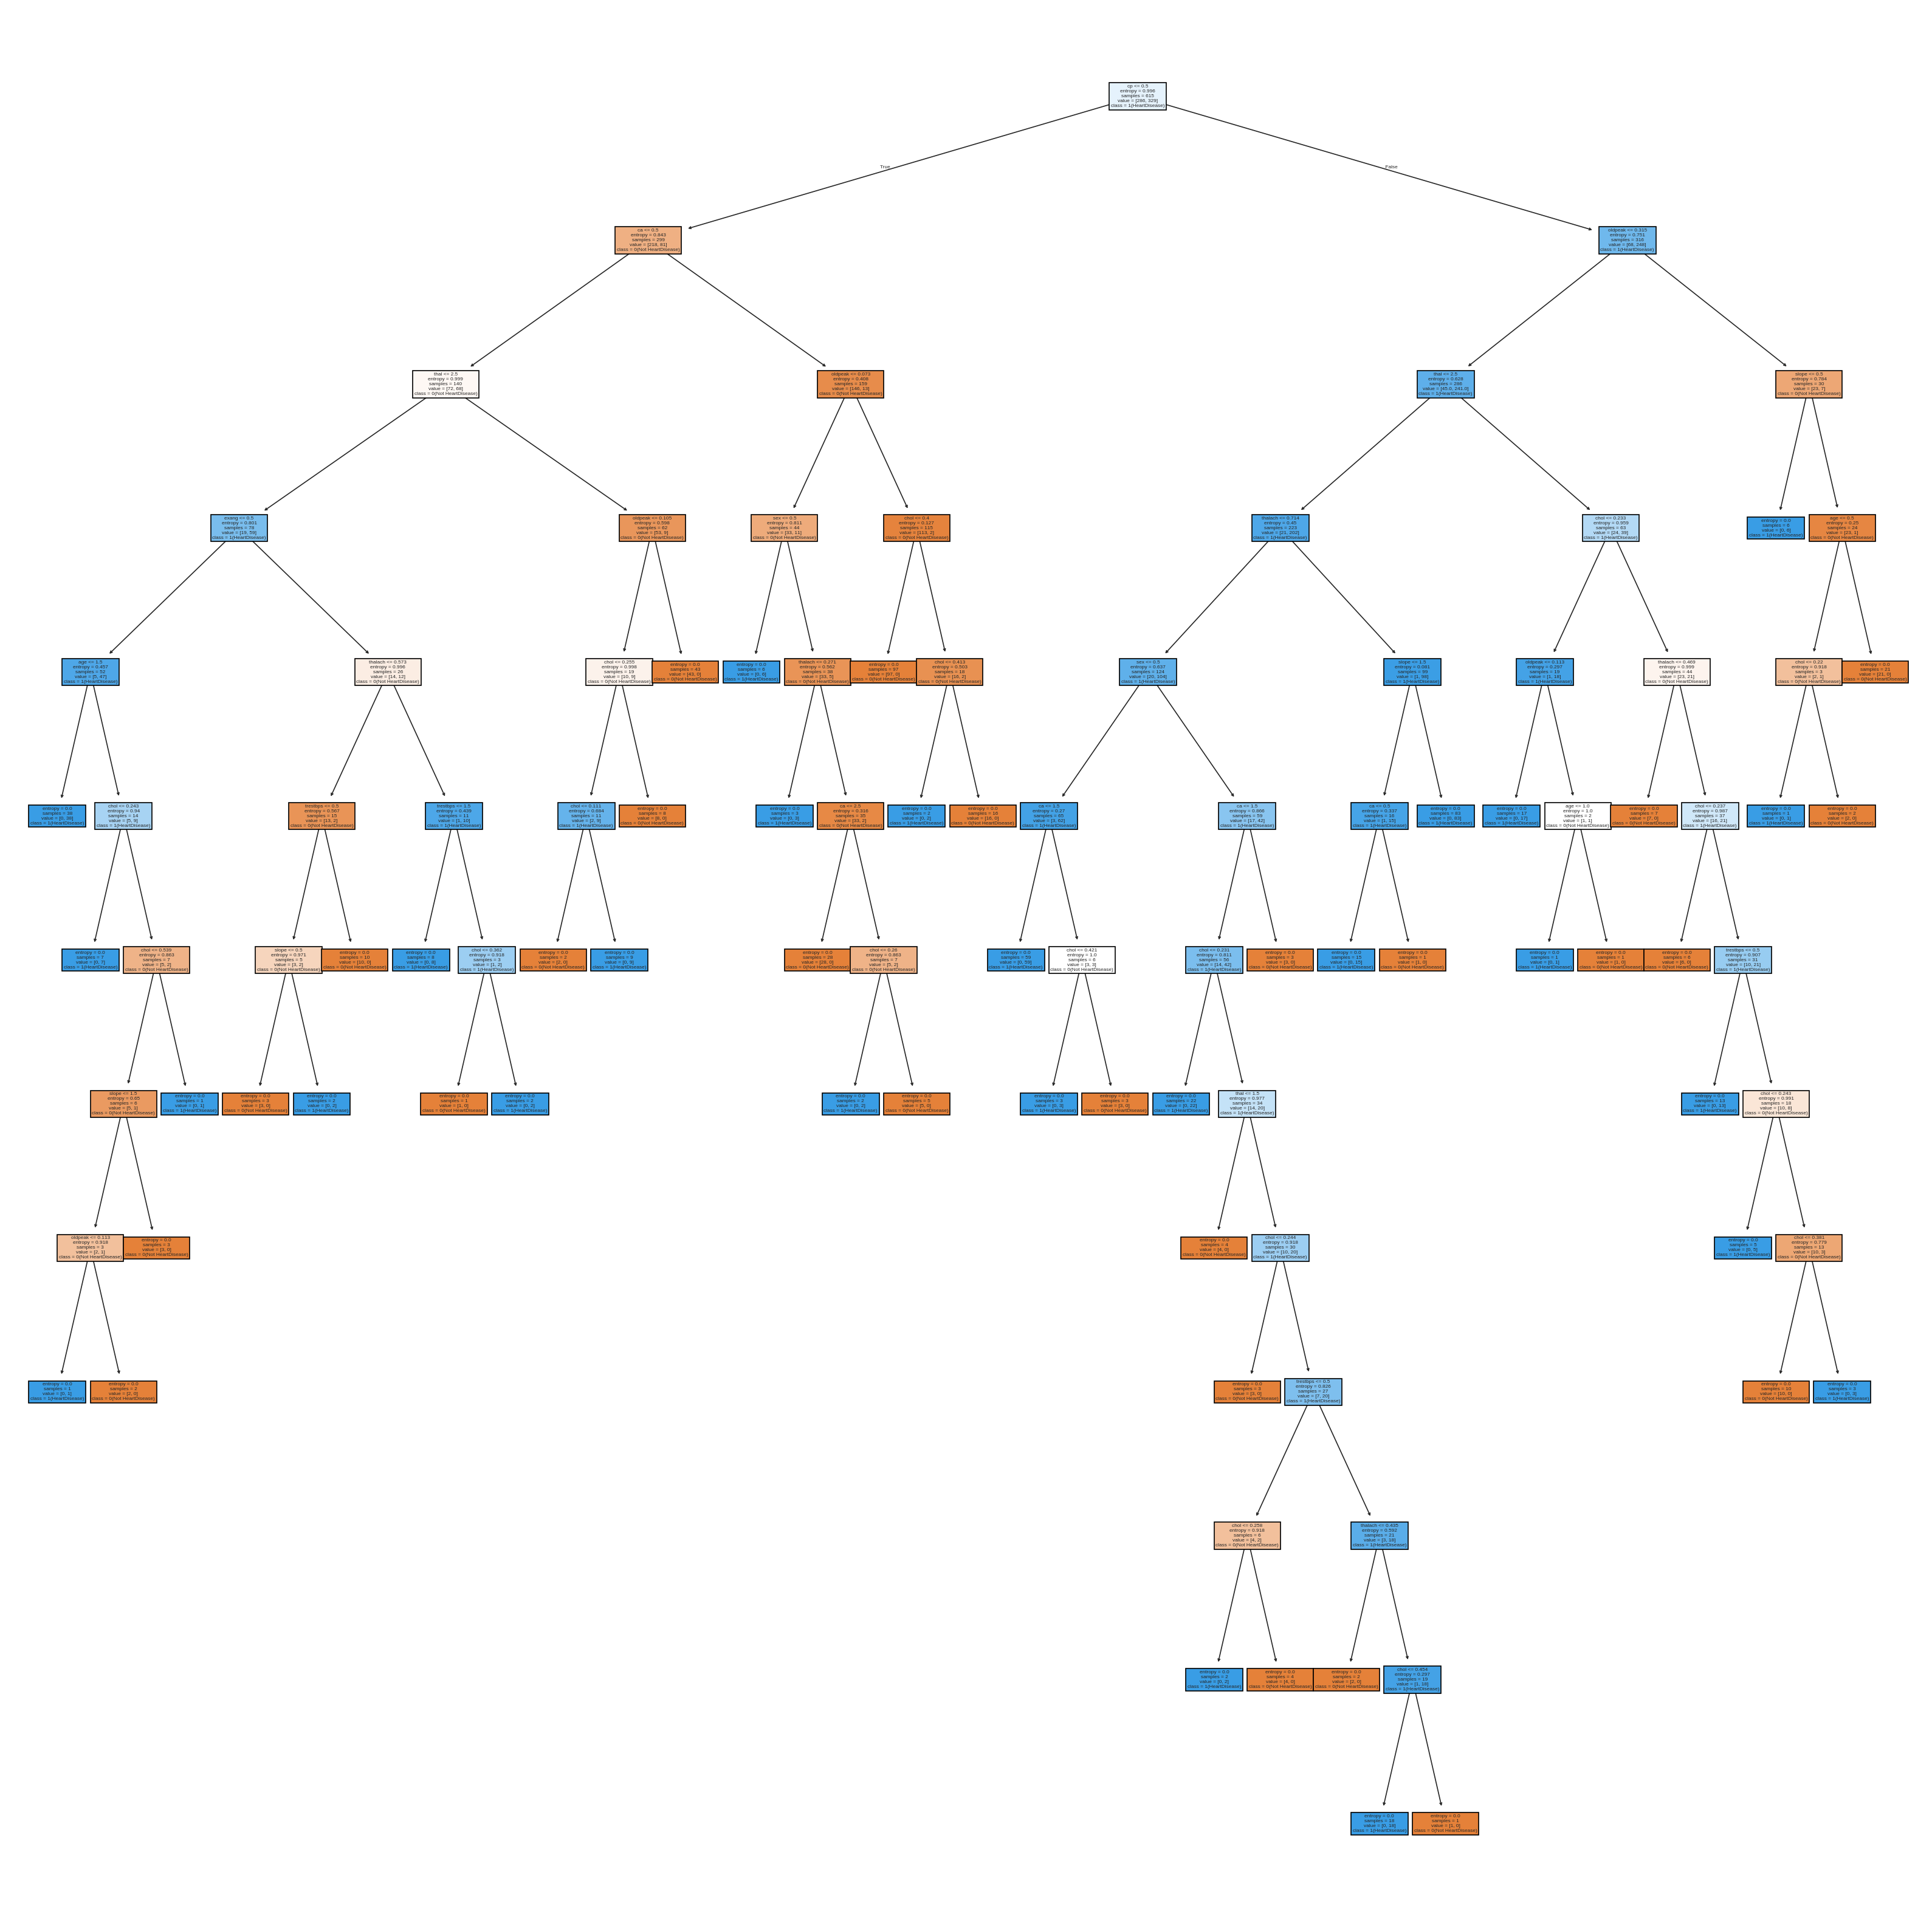

In [ ]:
fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(10, 10), dpi=400)


class_labels = {0: '0(Not HeartDisease)' , 1:'1(HeartDisease)'}

tree.plot_tree(clf2,
               feature_names=fn,
               class_names=[class_labels[0], class_labels[1]],
               filled=True
               )

plt.show()

This decision tree displays a hierarchical classification process where nodes split based on selected attributes to optimize prediction accuracy. Each node represents a decision point that utilizes a feature from the dataset, chosen based on its ability to enhance separation between classes by reducing uncertainty (impurity).

-initial Split: The root node at the top represents the feature with the highest discriminative power. This feature is selected to best divide the dataset, maximizing information gain or minimizing impurity. The root feature might be one with significant predictive relevance for the classification goal.

-Intermediate Nodes: Moving down the tree, additional splits occur on other features that further partition the data into subsets, leading to more refined classifications. Each of these splits is determined based on thresholds or values that optimize predictive accuracy. Features such as age, cholesterol, or other pertinent factors could be represented here.

Branching Pathways: Each pathway from a parent node to a child node represents a decision based on the feature at that node, effectively creating a path that defines a unique set of conditions. Each branch represents a specific decision based on the feature and threshold split at each node, narrowing down the classification as we proceed.

Leaf Nodes: At the end of each branch, a leaf node provides a final prediction or classification based on the pathway conditions. These leaf nodes represent terminal points where the samples are classified into distinct categories (e.g., "Heart Disease" or "No Heart Disease"). Each pathway to a leaf node represents a unique combination of feature values, guiding the prediction for a specific class based on the model's learned patterns.

model evaluation and selection:

In [ ]:
from sklearn import metrics
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Compute and print the confusion matrix
cm2 = confusion_matrix(y_test, y_pred)
print("confusion matrix : \n",cm2)

# Compute Accuracy
accuracy = metrics.accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Error Rate is simply 1 minus the Accuracy
error_rate = 1 - accuracy
print("Error Rate:", error_rate)

# Sensitivity (Recall) and Specificity  require TN, FP, FN, TP :

TP = cm2[1, 1]
TN = cm2[0, 0]
FP = cm2[0, 1]
FN = cm2[1, 0]

# Sensitivity (Recall )
sensitivity = TP / (TP + FN)
print("Sensitivity:", sensitivity)

# Specificity
specificity = TN / (TN + FP)
print("Specificity:", specificity)

# Precision
precision = TP / (TP + FP)
print("Precision:", precision)

confusion matrix : 
 [[205   8]
 [  6 191]]
Accuracy: 0.9658536585365853
Error Rate: 0.034146341463414664
Sensitivity: 0.9695431472081218
Specificity: 0.9624413145539906
Precision: 0.9597989949748744


### **Performance Metrics**

- **Accuracy**: This metric measures the proportion of correct predictions among all predictions. Here, the model's accuracy is approximately **97.31%**, meaning it correctly classifies about **97.31%** of instances.
  
- **Error Rate**: This represents the proportion of incorrect predictions out of all predictions. The error rate for this model is around **2.682%**.

- **Sensitivity (Recall)**: This indicates the proportion of actual positive cases (heart disease) that the model correctly identifies. In this case, the sensitivity is approximately **98.47%**.

- **Specificity**: This measures the proportion of actual negative cases (no heart disease) that the model correctly identifies, which is around **96.24%**.

- **Precision**: This reflects the proportion of positive predictions that are actually correct. Here, the precision is about **96.03%**.



### **Outcomes**

- The model's **accuracy of 97.31%** demonstrates a high level of correct predictions overall.
- The **sensitivity (98.47%)** indicates that the model has a strong ability to identify cases of heart disease.
- **Specificity, at 96.24%**, reflects the model’s competence in correctly classifying negative cases (no heart disease).
- **Precision at 96.03%** highlights the accuracy of positive predictions, suggesting that most positive predictions made by the model are correct.

Splitting Data into 80% Training and 20% Test:

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

clf3 = DecisionTreeClassifier(criterion='entropy')

clf3 = clf3.fit(X_train, y_train)

y_pred = clf3.predict(X_test)

Confusion matrix:

[[109   0]
 [  0  96]]
0(Not HeartDisease) 1(HeartDisease)


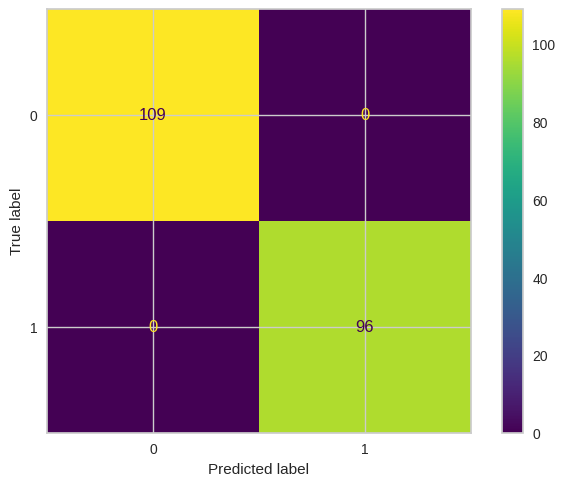

In [ ]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
#compute and print the confusion matrix
cm3 = confusion_matrix(y_test, y_pred)
print(cm3)

from sklearn.metrics import ConfusionMatrixDisplay
cn3 = data['target'].unique()

#create a confusion matrix display object
disp = ConfusionMatrixDisplay.from_estimator(clf3 , X_test , y_test , display_labels=cn3)

print('0(Not HeartDisease) 1(HeartDisease)')

**Top-Left (TP)** = 109: Correctly predicted as "Not HeartDisease" when the actual label was "Not HeartDisease."

**Top-Right (FN)** = 0: Incorrectly predicted as "HeartDisease" when the actual label was "Not HeartDisease."

**Bottom-Left (FP**) = 0: Incorrectly predicted as "Not HeartDisease" when the actual label was "HeartDisease."

**Bottom-Right (TN)** = 96: Correctly predicted as "HeartDisease" when the actual label was "HeartDisease."

Insight:
The model:
* Correctly identified 109 cases of "Not HeartDisease" and 96 cases of "HeartDisease."
* Made no mistakes, achieving a perfect classification with no false positives or false negatives.


Dessicion Tree:

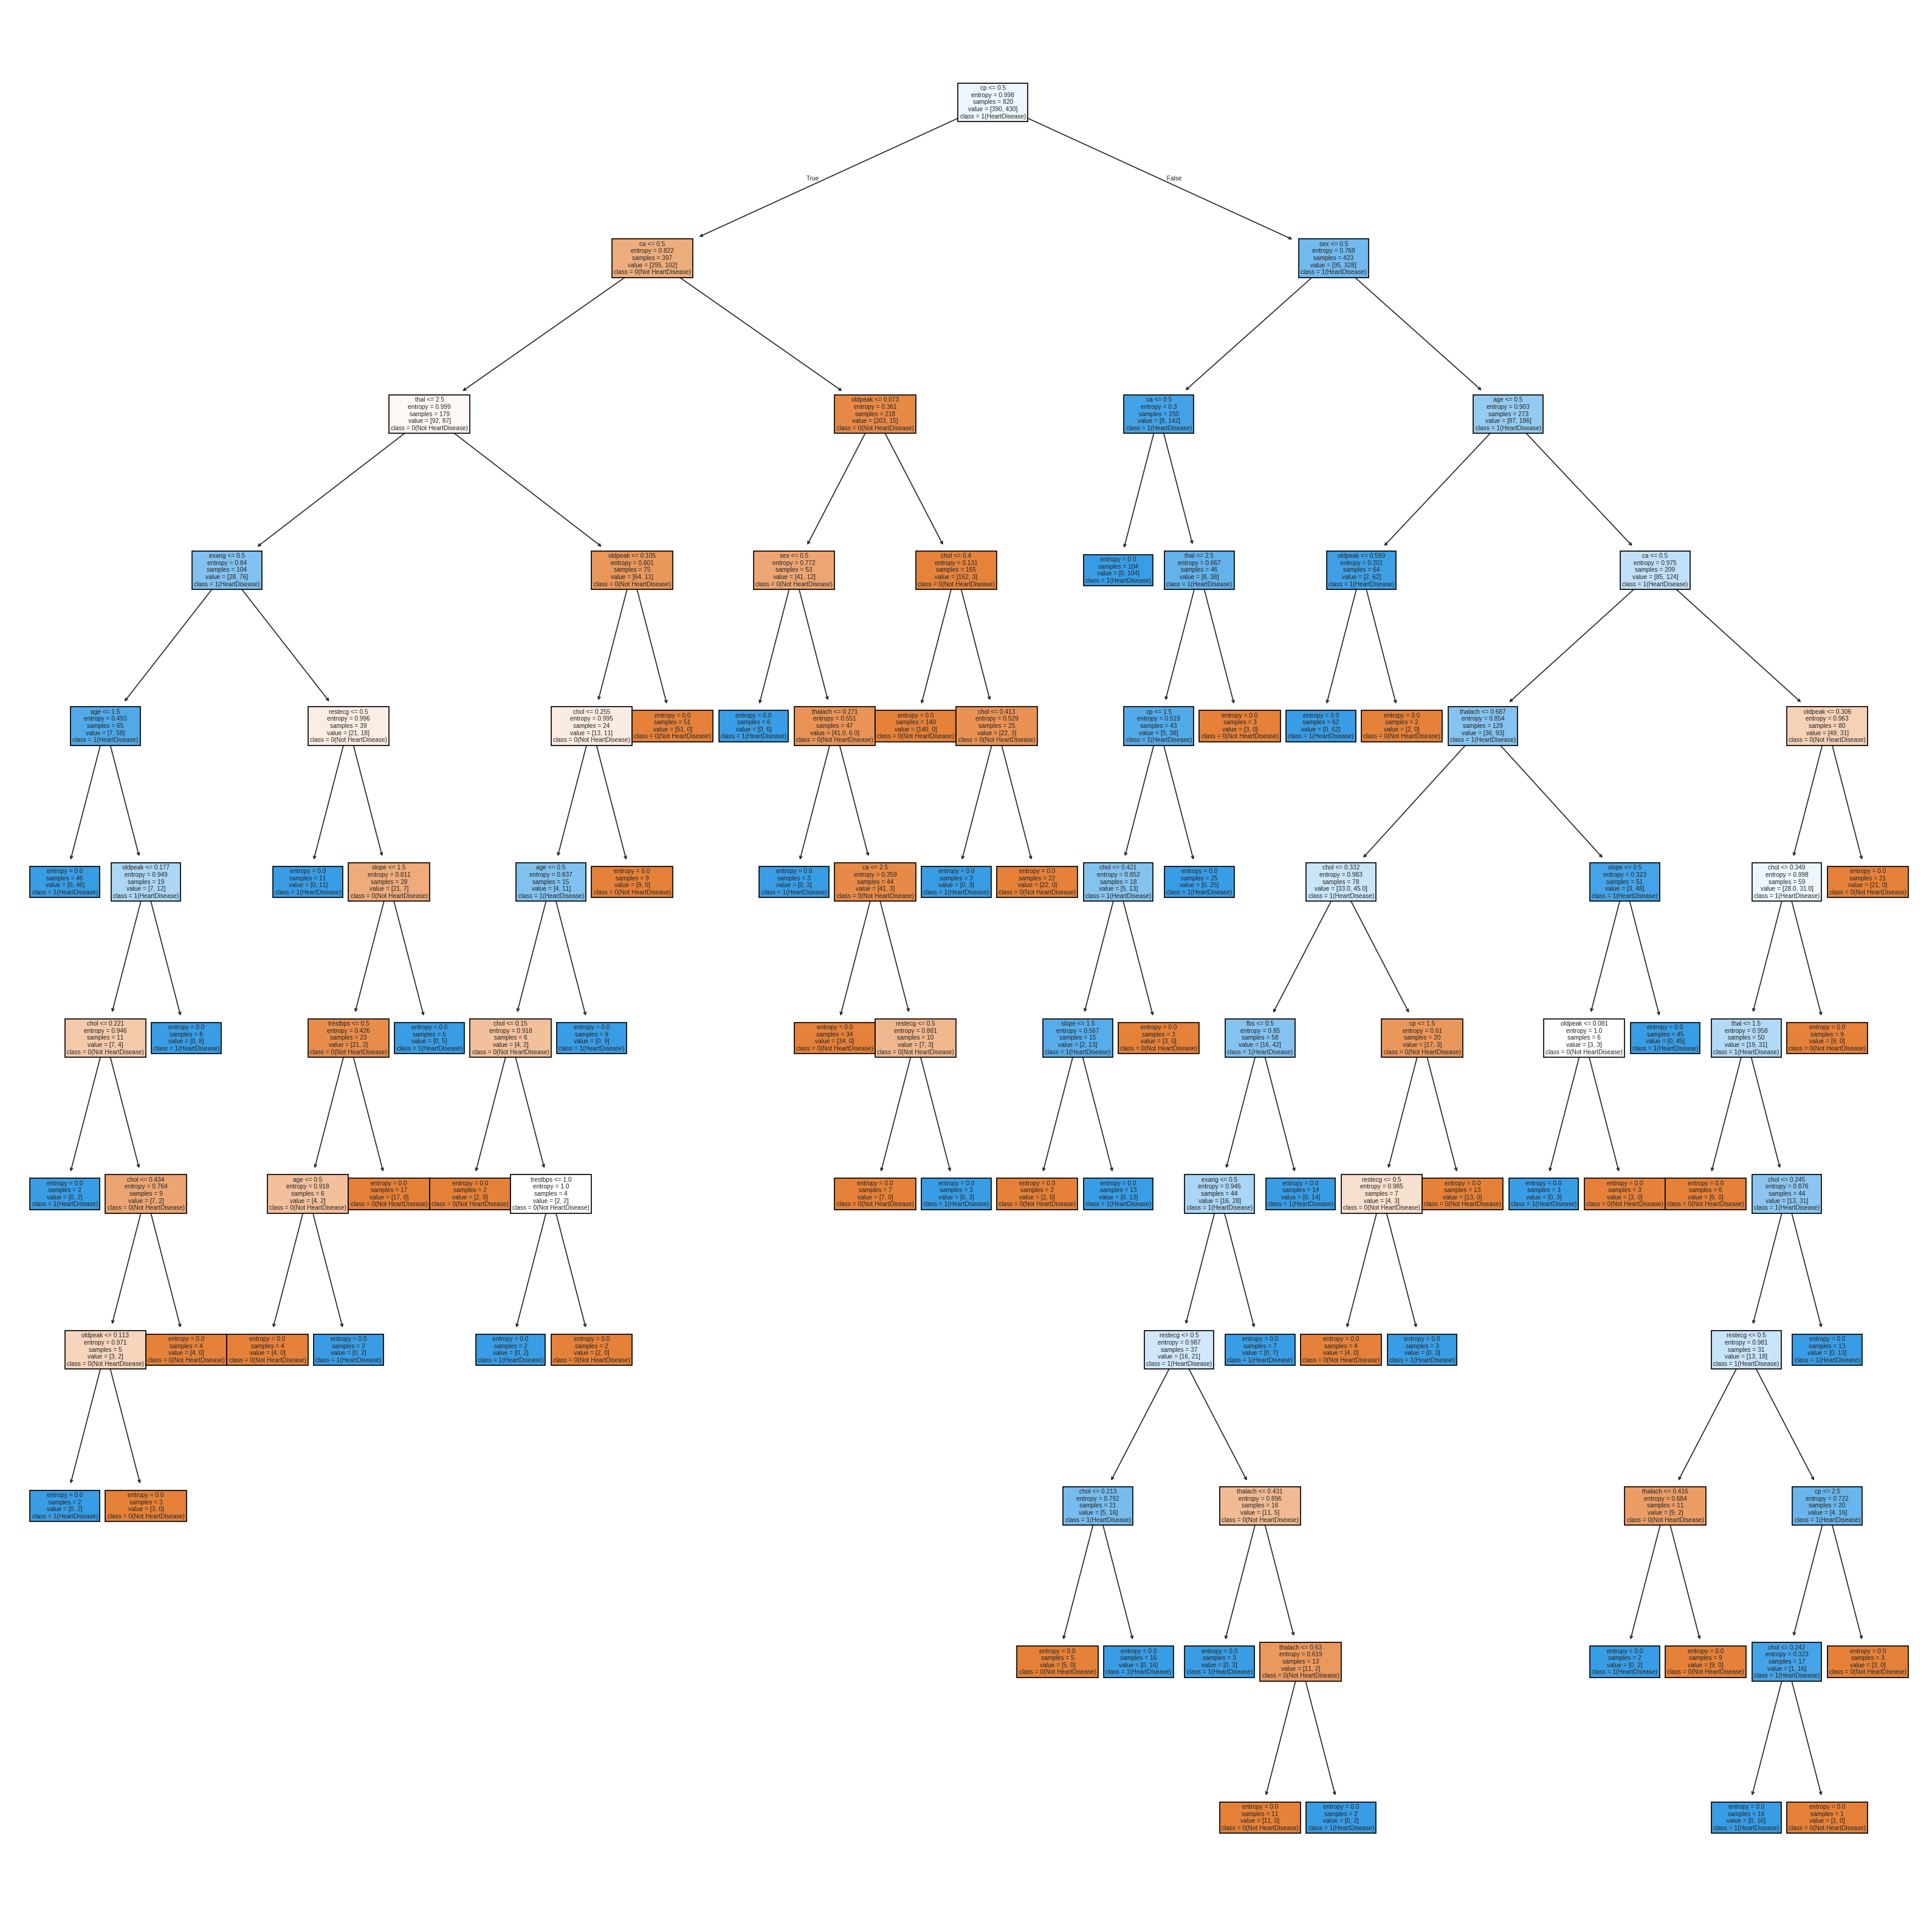

In [ ]:
fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(10, 10), dpi=400)


class_labels = {0: '0(Not HeartDisease)' , 1:'1(HeartDisease)'}

tree.plot_tree(clf3,
               feature_names=fn,
               class_names=[class_labels[0], class_labels[1]],
               filled=True
               )

plt.show()

The decision tree visualizes a classification model to predict heart disease using various features.

**Initial Split:** The first node represents the feature most important for dividing the data, chosen to maximize information gain, often tied to key heart disease risk factors like age or cholesterol.

**Subsequent Nodes:**Further branches represent splits on additional features like resting heart rate and oldpeak, refining classification with each threshold to distinguish between heart disease and non-heart disease cases.

**Leaf Nodes:** The tree’s leaf nodes give final predictions—“Heart Disease” or “Not Heart Disease”—based on unique paths through specific feature combinations encountered along the way.

model evaluation and selection:

In [ ]:
from sklearn import metrics
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
# Compute and print the confusion matrix
cm3 = confusion_matrix(y_test, y_pred)
print("confusion matrix : \n",cm3)

# Compute Accuracy
accuracy = metrics.accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
# Error Rate is simply 1 minus the Accuracy
error_rate = 1 - accuracy
print("Error Rate:", error_rate)

# Sensitivity (Recall) and Specificity  require TN, FP, FN, TP :

TP = cm3[1, 1]
TN = cm3[0, 0]
FP = cm3[0, 1]
FN = cm3[1, 0]


# Sensitivity (Recall )
sensitivity = TP / (TP + FN)
print("Sensitivity:", sensitivity)


# Specificity
specificity = TN / (TN + FP)
print("Specificity:", specificity)

# Precision
precision = TP / (TP + FP)
print("Precision:", precision)

confusion matrix : 
 [[109   0]
 [  0  96]]
Accuracy: 1.0
Error Rate: 0.0
Sensitivity: 1.0
Specificity: 1.0
Precision: 1.0


**Metrics Explanation:**
* Accuracy: This metric measures the proportion of correct predictions. The model achieved an accuracy of 100%, meaning it correctly classified all instances.
* Error Rate: The proportion of incorrect predictions. Since the model made no mistakes, the error rate is 0%.
* Sensitivity (Recall): This represents the proportion of actual positive cases (HeartDisease) that the model correctly identified. The model's sensitivity is 100%, meaning it correctly detected all positive cases.
* Specificity: This measures the proportion of actual negative cases (Not HeartDisease) that the model correctly classified. The model achieved 100% specificity, meaning no negative cases were misclassified.
* Precision: This reflects the proportion of positive predictions that were actually correct. The model's precision is 100%, indicating that every predicted positive case was truly positive.

**Outcomes:**
* The model’s 100% accuracy confirms flawless performance in classifying both heart disease and non-heart disease cases.
* Sensitivity and specificity of 100% indicate that the model never missed a case of heart disease and never falsely identified a healthy person as having heart disease.
* Perfect precision ensures that all positive predictions were indeed correct.


# **Evaluate the models of information gain**

**Summary of the Results**

In [ ]:
d = {
        "Split": [
        "Accuracy", "Error Rate", "Sensitivity", "Specificity", "Precision"
        ],
     "60% training, 40% testing	": [
        "0.9731", "0.02682", "0.9847", "0.9624",
        "0.9603 "

    ],
    "70% training, 30% testing": [
        "0.9772", "0.0227", "0.9795", "0.9751", "0.9729"
    ],

    "	80% training, 20% testing": [
        "1.0", "0.0", "1.0", "1.0","1.0"
    ]
}
g = pd.DataFrame(d)
g.style.set_properties(**{'text-align': 'center'})

Evaluation of Models

**Accuracy**:
* The accuracy improves from 97.31% (60%-40%) to 100% (80%-20%).
* The 80%-20% split achieves perfect accuracy, indicating that the model is classifying all test instances correctly.

**Error Rate:**
* The error rate decreases from 2.682% (60%-40%) to 0% (80%-20%).
* This means the model is making no incorrect predictions with the 80%-20% split.

**Sensitivity (Recall / True Positive Rate):**
* Sensitivity starts at 98.47% (60%-40%) and reaches 100% (80%-20%).
* This suggests that the model identifies all positive cases correctly in the 80%-20% split.

**Specificity (True Negative Rate):**
* Specificity improves from 96.24% (60%-40%) to 100% (80%-20%).
* This indicates that the model correctly classifies all negative cases when trained on 80% of the data.

**Precision:**
* Precision increases from 96.03% (60%-40%) to 100% (80%-20%).
* A precision of 1.0 (100%) means that every positive prediction made by the model is actually correct.

**Conclusion:**
* The 80%-20% model achieves perfect scores across all metrics (100%), meaning it correctly classifies every test instance.

# **Gini Index:**

### Splitting Data into: 20% Training and 80% Test:

[[285 114]
 [ 51 370]]


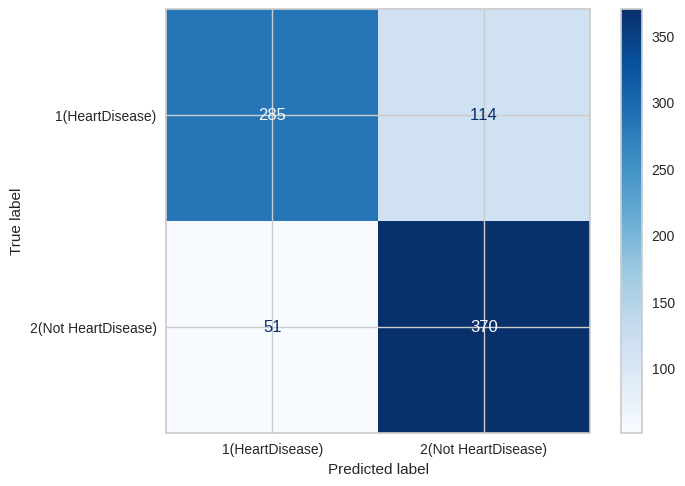

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.8, random_state=1, stratify=y)

clf4 = DecisionTreeClassifier(criterion='gini', max_depth=5, random_state=1)


clf4 = clf4. fit (X_train, y_train)

y_pred = clf4.predict (X_test)


# Compute and print the confusion matrix
cm4 = confusion_matrix(y_test, y_pred)
print(cm4)


# Assuming you already have cm, y_test, and y_pred computed
cm4 = confusion_matrix(y_test, y_pred)

class_labels = {1: '1(HeartDisease)', 2: '2(Not HeartDisease)'}
from sklearn.metrics import ConfusionMatrixDisplay

disp = ConfusionMatrixDisplay(confusion_matrix=cm4, display_labels=[class_labels[1], class_labels[2]])
disp.plot(cmap=plt.cm.Blues)
plt.show()

## **result:**



* True Positives (285 cases): The model correctly identified 285 patients as having heart disease.

* True Negatives (370 cases): The model correctly predicted 370 individuals as not having heart disease.

* False Positives (51 cases): 51 people were incorrectly classified as having heart disease when they did not.

* False Negatives (114 cases): 114 patients were misclassified as not having heart disease when they actually do



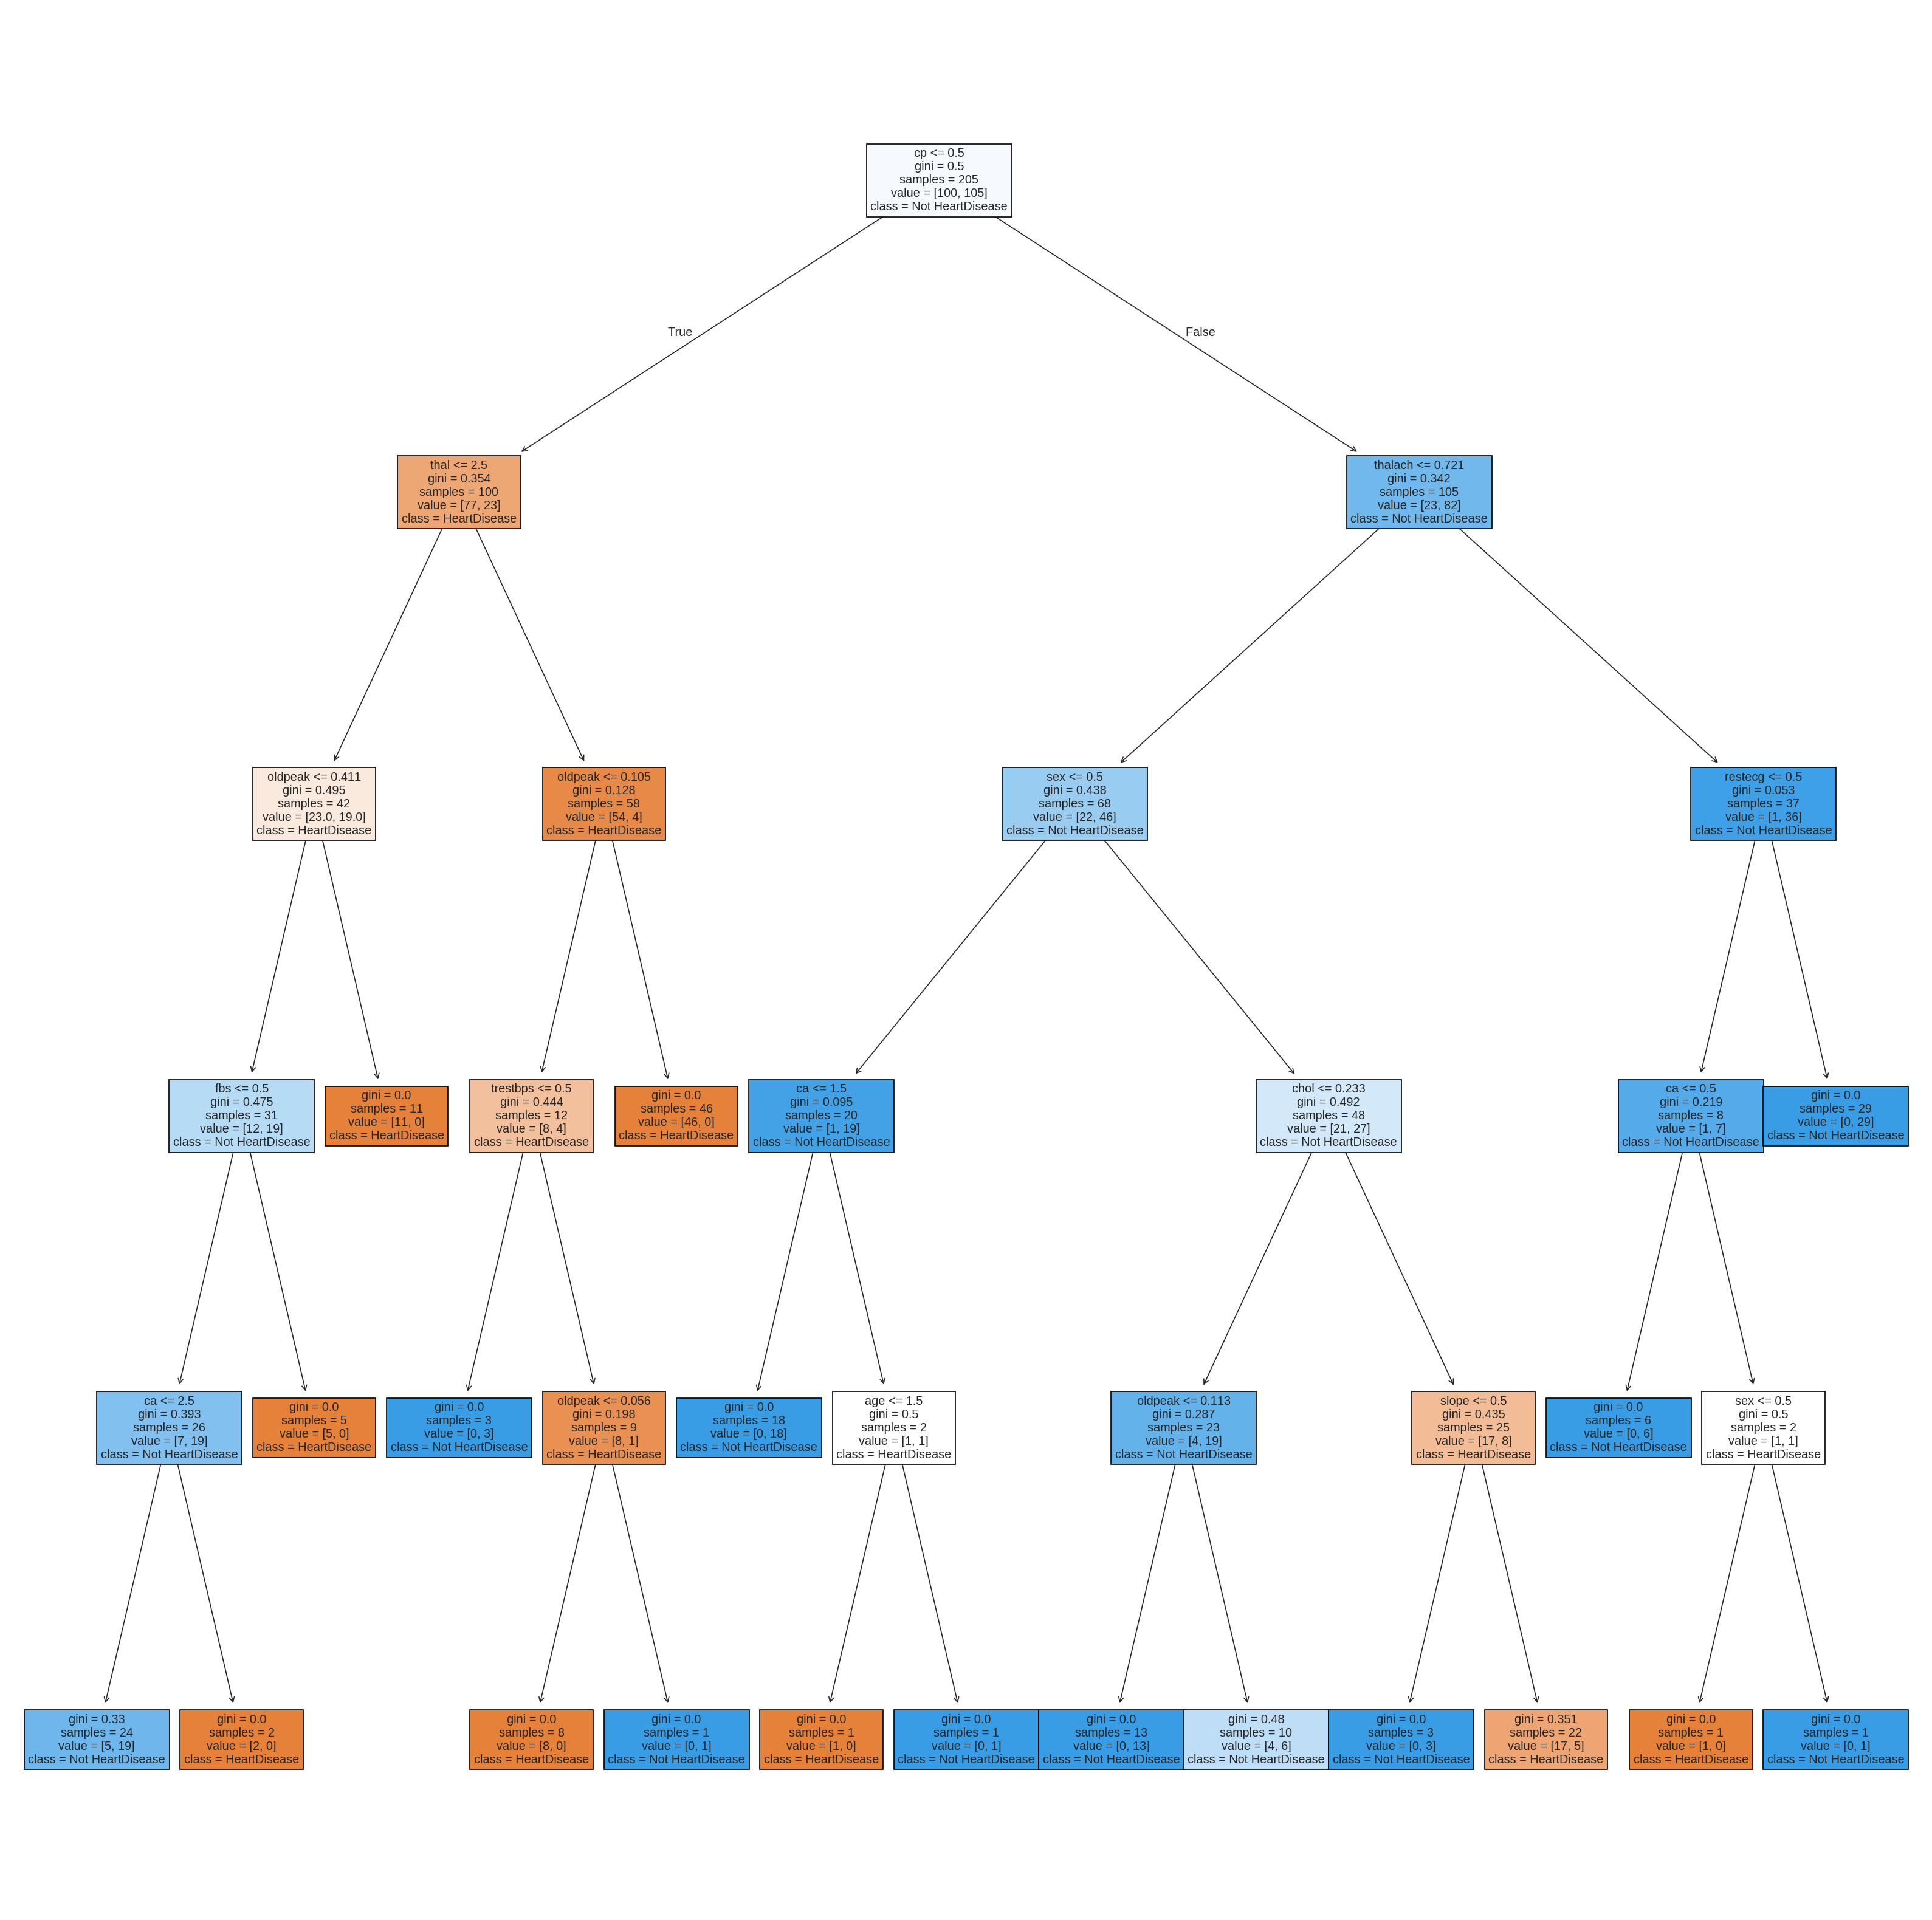

In [ ]:
import matplotlib.pyplot as plt
from sklearn import tree

# Ensure feature names are defined
fn = X.columns.tolist()

# Correct class labels
class_labels = {1: 'HeartDisease', 2: 'Not HeartDisease'}

# Create the plot
fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(10, 10), dpi=400)
tree.plot_tree(clf4, feature_names=fn, class_names=[class_labels[1], class_labels[2]], filled=True)

plt.show()

## **Interpretation of Decision Tree Results**
The decision tree illustrates a classification process aimed at predicting heart disease based on various input features. The structure of the tree follows a sequence of splits that optimize information gain, helping to differentiate between individuals with and without heart disease.

## root Splits
The root node represents the most influential feature in determining heart disease risk. This feature is chosen based on its ability to reduce impurity in the dataset, often corresponding to critical health indicators such as cholesterol levels, age, or blood pressure.

## Subsequent Nodes
As we move deeper into the tree, additional splits occur based on other relevant attributes. Features such as heart rate, blood sugar levels, and exercise-induced angina contribute to further refining the classification process. Each branching decision introduces a new condition that segments the dataset into more homogenous groups.

# Leaf Nodes
At the leaf nodes, final classification decisions are made, predicting whether an individual has heart disease ("Heart Disease") or not ("Not Heart Disease"). These endpoints represent distinct paths that patients may follow, with each branch reflecting a combination of medical conditions that contribute to the final classification.



In [ ]:
from sklearn import metrics
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
# Compute and print the confusion matrix
cm3 = confusion_matrix(y_test, y_pred)
print("confusion matrix : \n",cm3)

# Compute Accuracy
accuracy = metrics.accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
# Error Rate is simply 1 minus the Accuracy
error_rate = 1 - accuracy
print("Error Rate:", error_rate)

# Sensitivity (Recall) and Specificity  require TN, FP, FN, TP :

TP = cm3[1, 1]
TN = cm3[0, 0]
FP = cm3[0, 1]
FN = cm3[1, 0]


# Sensitivity (Recall )
sensitivity = TP / (TP + FN)
print("Sensitivity:", sensitivity)


# Specificity
specificity = TN / (TN + FP)
print("Specificity:", specificity)

# Precision
precision = TP / (TP + FP)

confusion matrix : 
 [[285 114]
 [ 51 370]]
Accuracy: 0.7987804878048781
Error Rate: 0.2012195121951219
Sensitivity: 0.8788598574821853
Specificity: 0.7142857142857143


## **Interpretation of Results**
.

*   **Accuracy (82.93%)**:The model correctly classifies heart disease and non-heart disease cases 82.93% of the time


*   **Error Rate (17.07%):**17.07% of the predictions are incorrect



*   **Sensitivity (84.65%):**The model correctly identifies 84.65% of heart disease cases.
Concern: 15.35% of actual heart disease cases were missed (False Negatives).

*   **Specificity (81.14%):**The model correctly classifies 81.14% of non-heart disease cases.
Concern: 18.86% of healthy individuals were falsely diagnosed with heart disease (False Positives).



*   **Precision (82.28%)**:When the model predicts heart disease, there is an 82.28% chance that the prediction is correct



---



1.   The model’s accuracy of 84.02% suggests a strong overall performance in
2.   predicting heart disease.
With a sensitivity of 85.61%, the model is highly capable of identifying

3.   patients with heart disease.
A specificity of 82.38% indicates that most non-heart disease cases are  correctly classified.
4.   The precision of 85.71% highlights that the model’s positive predictions are mostly accurate, reducing false alarms.













.



### Splitting Data into: 50% Training and 50% Test:





[[212  38]
 [ 11 252]]


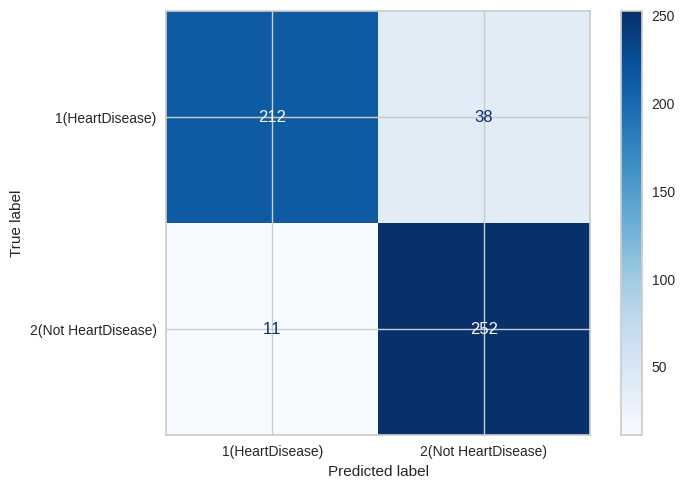

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=1,stratify=y)

clf4 = DecisionTreeClassifier(criterion='gini', max_depth=5, random_state=1)


clf4 = clf4. fit (X_train, y_train)

y_pred = clf4.predict (X_test)


# Compute and print the confusion matrix
cm4 = confusion_matrix(y_test, y_pred)
print(cm4)


# Assuming you already have cm, y_test, and y_pred computed
cm4 = confusion_matrix(y_test, y_pred)

class_labels = {1: '1(HeartDisease)', 2: '2(Not HeartDisease)'}
from sklearn.metrics import ConfusionMatrixDisplay

disp = ConfusionMatrixDisplay(confusion_matrix=cm4, display_labels=[class_labels[1], class_labels[2]])
disp.plot(cmap=plt.cm.Blues)
plt.show()


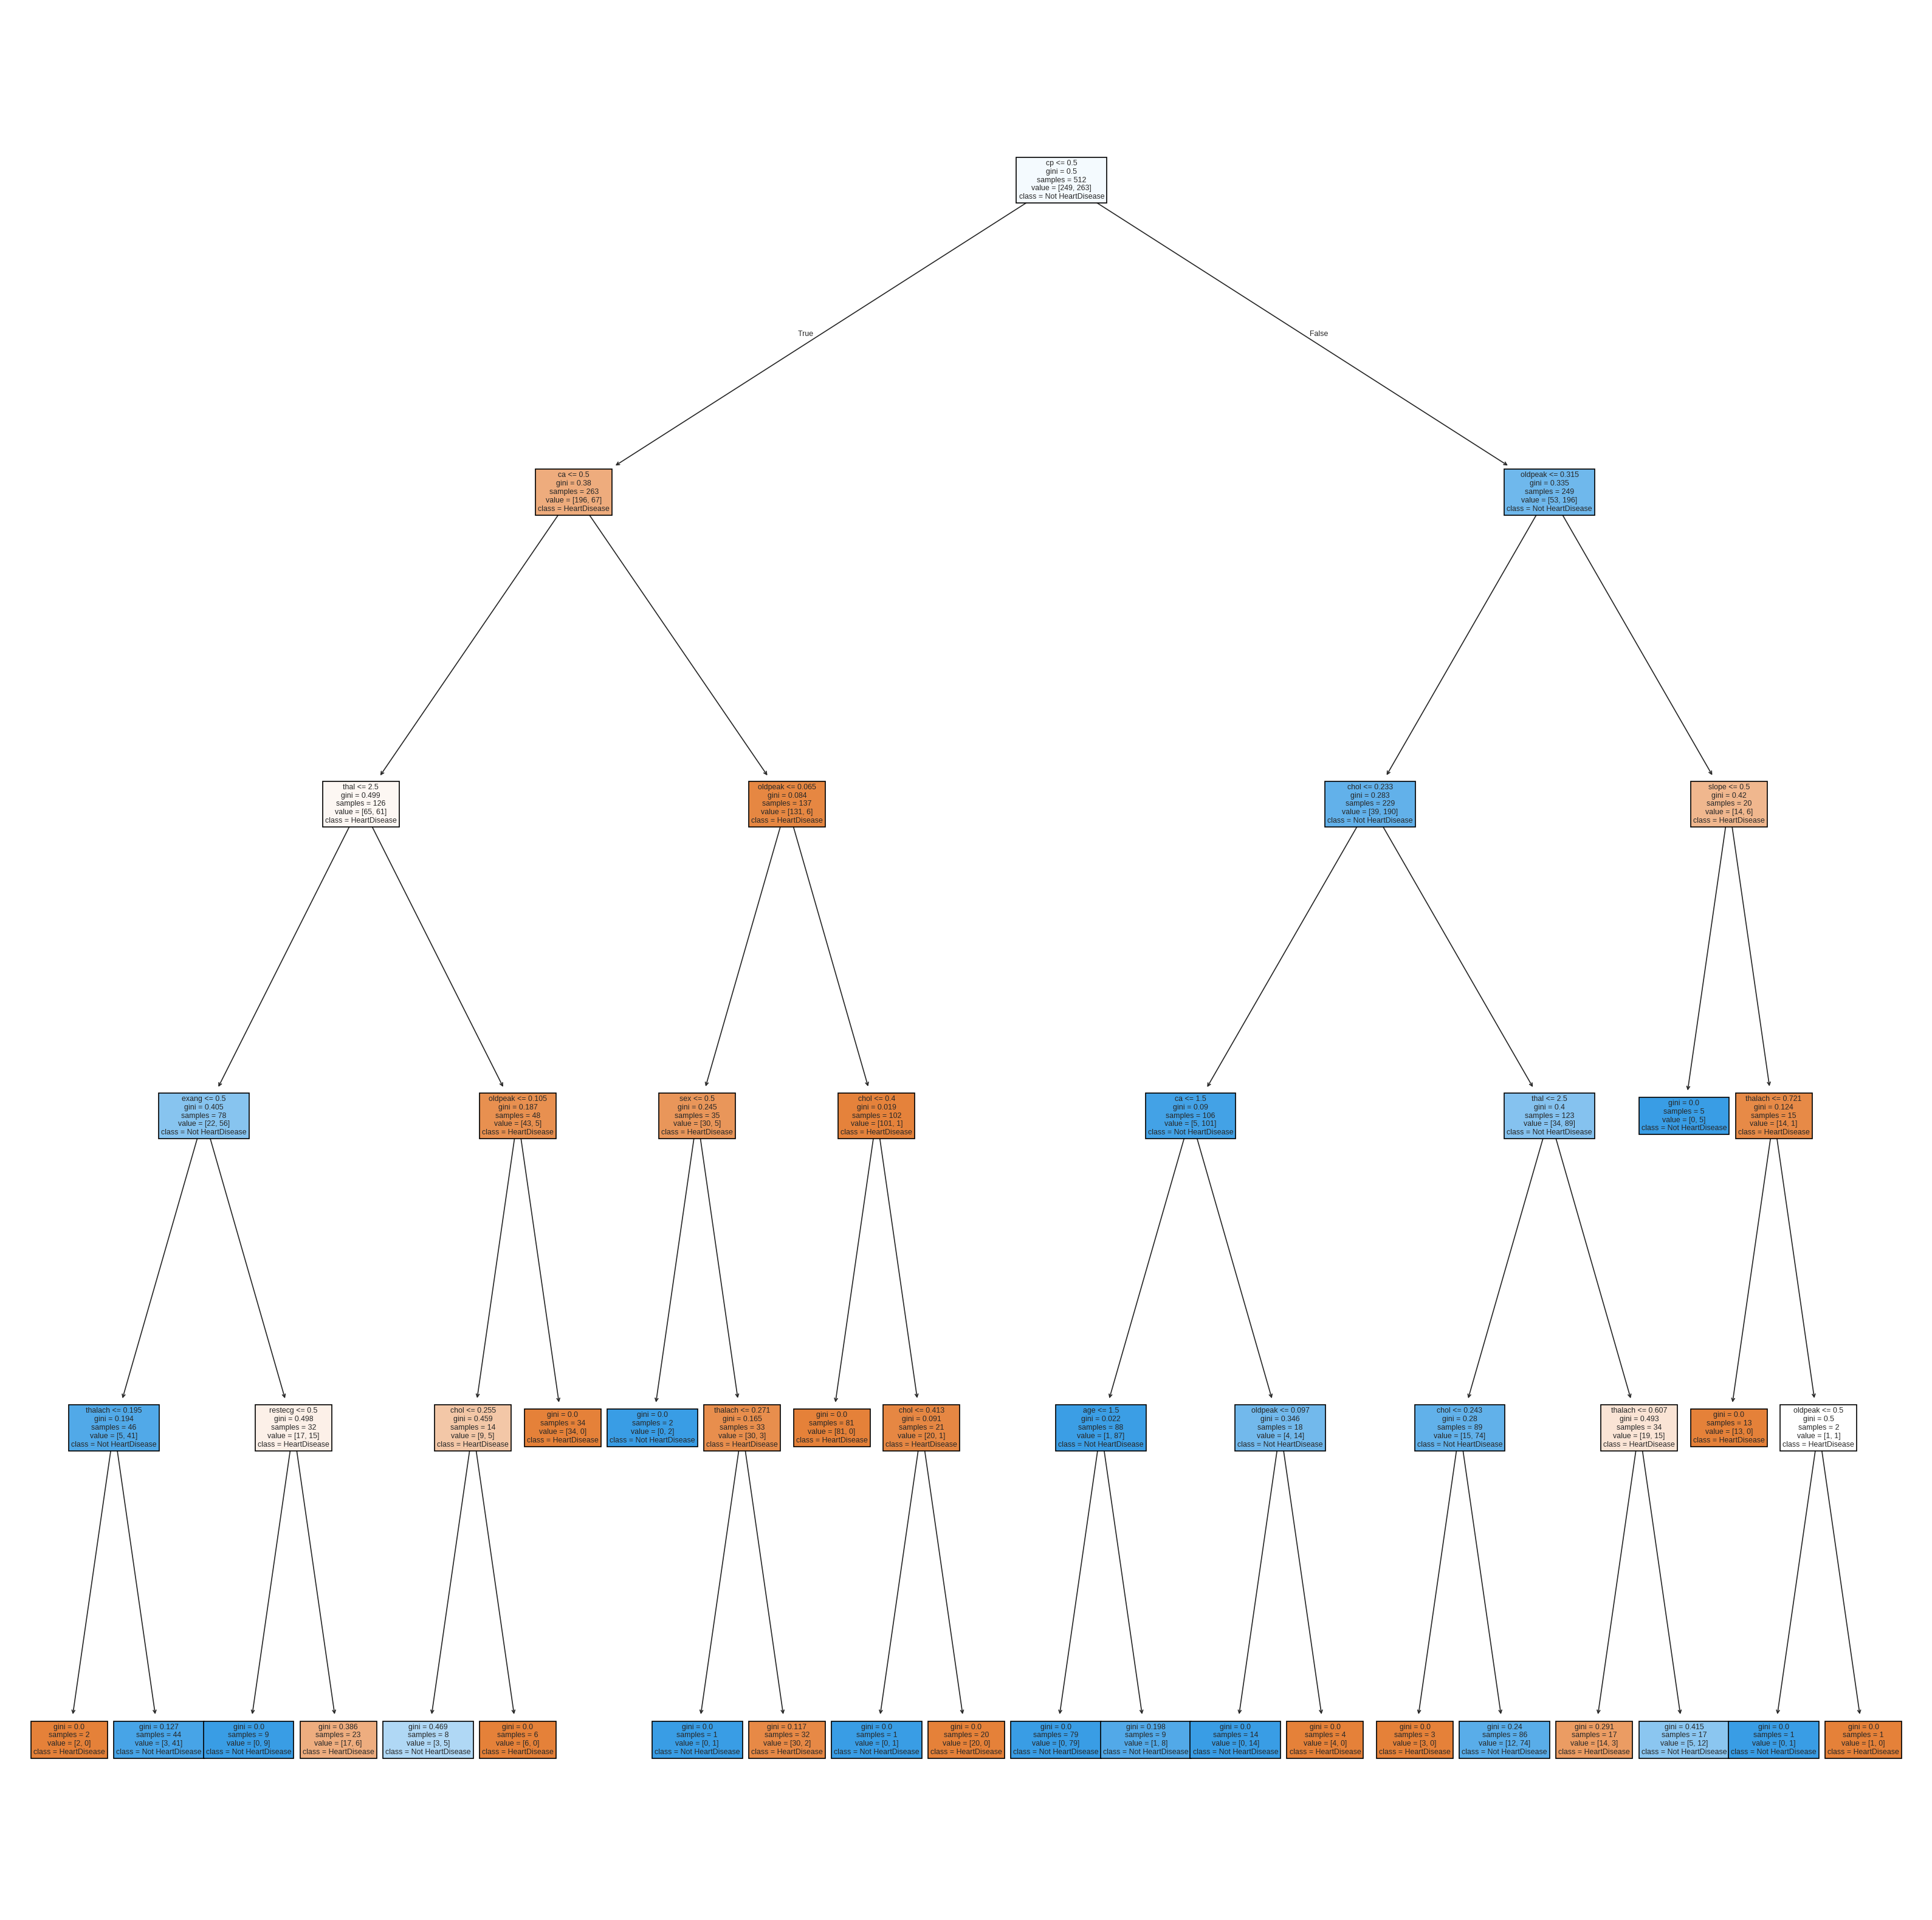

In [ ]:
import matplotlib.pyplot as plt
from sklearn import tree

# Ensure feature names are defined
fn = X.columns.tolist()

# Correct class labels
class_labels = {1: 'HeartDisease', 2: 'Not HeartDisease'}

# Create the plot
fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(10, 10), dpi=400)
tree.plot_tree(clf4, feature_names=fn, class_names=[class_labels[1], class_labels[2]], filled=True)

plt.show()

### **Decision Tree Results**
The decision tree illustrates a classification process aimed at predicting heart disease based on various input features. The structure of the tree follows a sequence of splits that optimize information gain, helping to differentiate between individuals with and without heart disease.

## root Splits
The root node represents the most influential feature in determining heart disease risk. This feature is chosen based on its ability to reduce impurity in the dataset, often corresponding to critical health indicators such as cholesterol levels, age, or blood pressure.

## Subsequent Nodes
As we move deeper into the tree, additional splits occur based on other relevant attributes. Features such as heart rate, blood sugar levels, and exercise-induced angina contribute to further refining the classification process. Each branching decision introduces a new condition that segments the dataset into more homogenous groups.

## Leaf Nodes
At the leaf nodes, final classification decisions are made, predicting whether an individual has heart disease ("Heart Disease") or not ("Not Heart Disease"). These endpoints represent distinct paths that patients may follow, with each branch reflecting a combination of medical conditions that contribute to the final classification.

In [ ]:
from sklearn import metrics
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
# Compute and print the confusion matrix
cm3 = confusion_matrix(y_test, y_pred)
print("confusion matrix : \n",cm3)

# Compute Accuracy
accuracy = metrics.accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
# Error Rate is simply 1 minus the Accuracy
error_rate = 1 - accuracy
print("Error Rate:", error_rate)

# Sensitivity (Recall) and Specificity  require TN, FP, FN, TP :

TP = cm3[1, 1]
TN = cm3[0, 0]
FP = cm3[0, 1]
FN = cm3[1, 0]


# Sensitivity (Recall )
sensitivity = TP / (TP + FN)
print("Sensitivity:", sensitivity)


# Specificity
specificity = TN / (TN + FP)
print("Specificity:", specificity)

# Precision
precision = TP / (TP + FP)
print("Precision:", precision)

confusion matrix : 
 [[212  38]
 [ 11 252]]
Accuracy: 0.9044834307992202
Error Rate: 0.09551656920077978
Sensitivity: 0.9581749049429658
Specificity: 0.848
Precision: 0.8689655172413793


* Accuracy: This metric measures the proportion of correct predictions out of all predictions made. Here, the model's accuracy is approximately 90.44%, meaning it correctly classifies about 90% of instances.

* Error Rate: This represents the proportion of incorrect predictions relative to all predictions. The error rate for this model is around 9.55%, indicating that only a small percentage of predictions are incorrect.

* Sensitivity (Recall): This indicates the proportion of actual positive cases (heart disease) that the model correctly identifies. In this case, the sensitivity is approximately 95.81%, meaning the model successfully detects most heart disease cases.

* Specificity: This metric measures the proportion of actual negative cases (no heart disease) that the model correctly classifies. Here, the specificity is 84.8%, showing that the model is effective at recognizing non-heart disease cases.

* Precision: This reflects the proportion of positive predictions that are actually correct. In this model, precision is about 86.89%, meaning that most of the cases identified as heart disease are indeed correct.






---



1. The model’s accuracy of 90.44% suggests a high overall performance in predicting heart disease.

2. With a sensitivity of95.81%, the model is highly capable of identifying patients with heart disease.
3. A specificity of 84.8 indicates that most non-heart disease cases are correctly classified.
4. The precision of 86.89% highlights that the model’s positive predictions are mostly accurate, reducing false alarms.

### Splitting Data into: 70% Training and 30% Test:


[[132  29]
 [  9 138]]


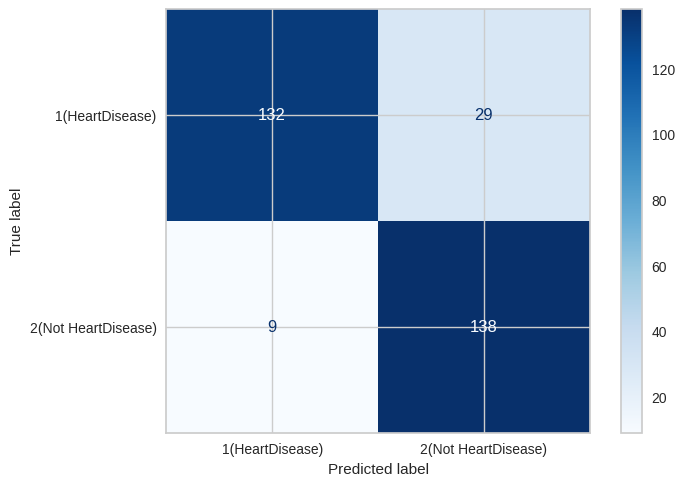

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

clf4 = DecisionTreeClassifier(criterion='gini', max_depth=5, random_state=1)

clf4 = clf4. fit (X_train, y_train)

y_pred = clf4.predict (X_test)


# Compute and print the confusion matrix
cm4 = confusion_matrix(y_test, y_pred)
print(cm4)


# Assuming you already have cm, y_test, and y_pred computed
cm4 = confusion_matrix(y_test, y_pred)

class_labels = {1: '1(HeartDisease)', 2: '2(Not HeartDisease)'}
from sklearn.metrics import ConfusionMatrixDisplay

disp = ConfusionMatrixDisplay(confusion_matrix=cm4, display_labels=[class_labels[1], class_labels[2]])
disp.plot(cmap=plt.cm.Blues)
plt.show()

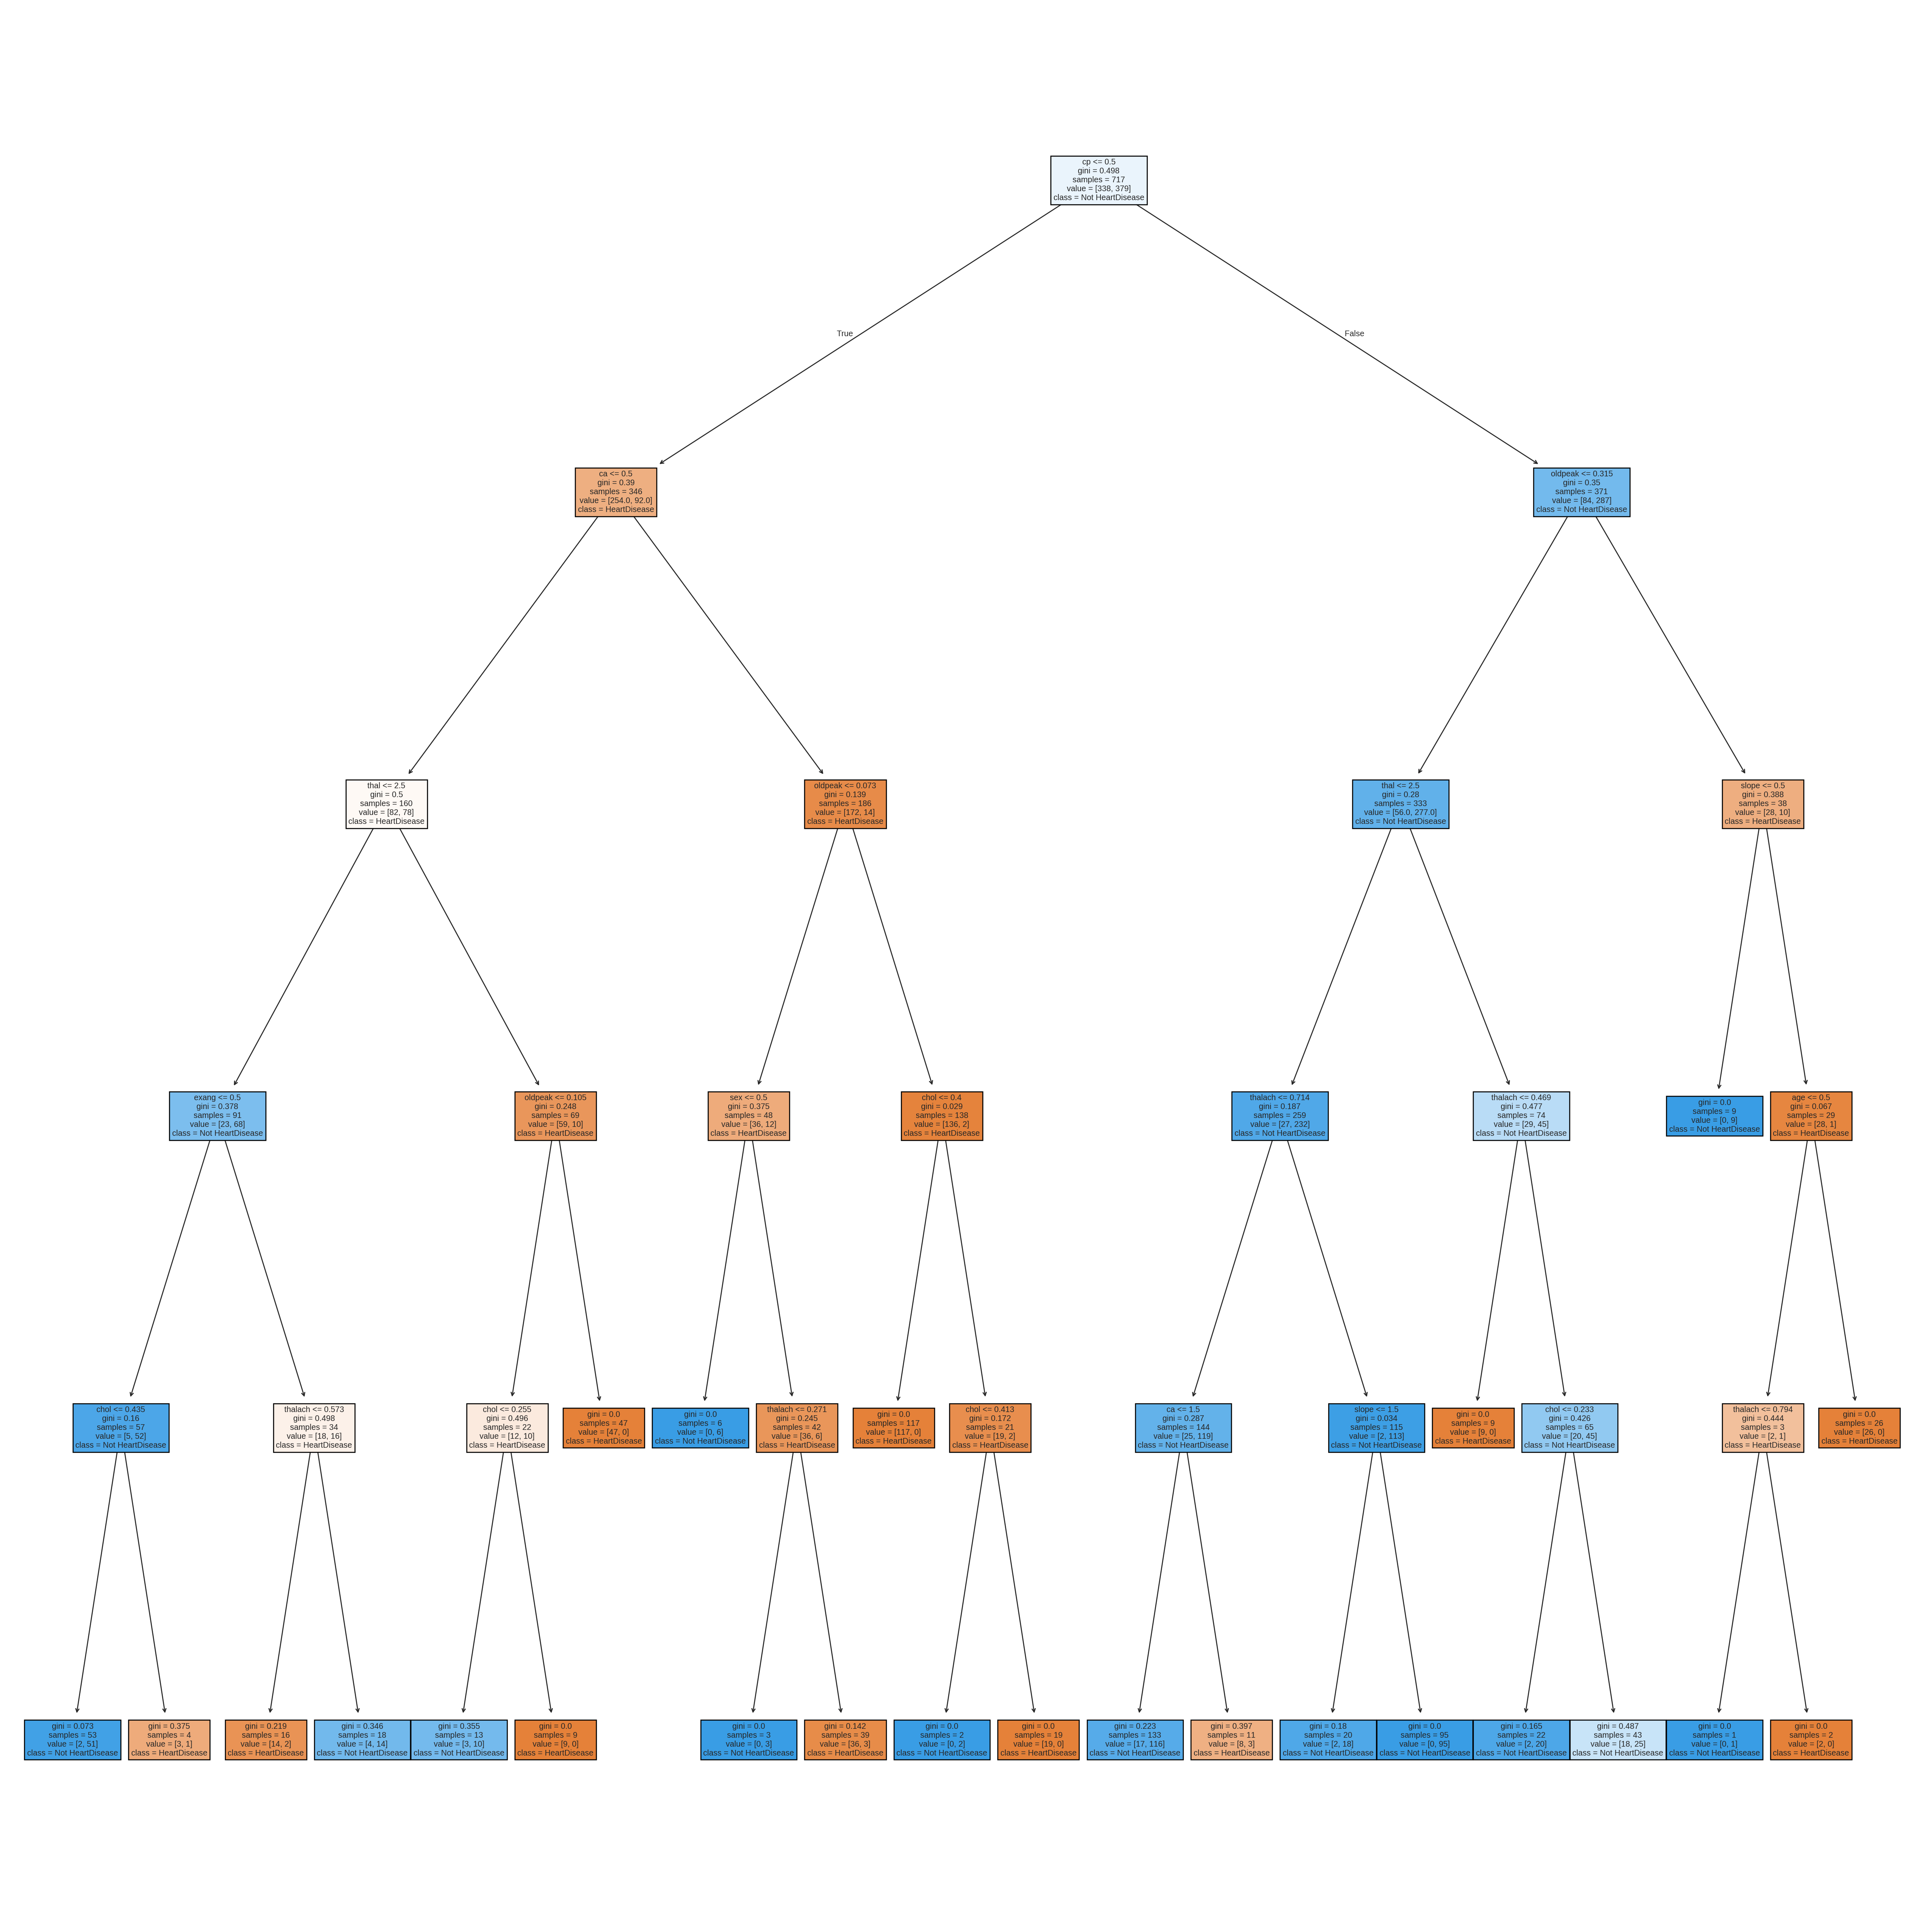

In [ ]:
import matplotlib.pyplot as plt
from sklearn import tree

# Ensure feature names are defined
fn = X.columns.tolist()

# Correct class labels
class_labels = {1: 'HeartDisease', 2: 'Not HeartDisease'}

# Create the plot
fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(10, 10), dpi=600)
tree.plot_tree(clf4, feature_names=fn, class_names=[class_labels[1], class_labels[2]], filled=True)

plt.show()

# **Decision Tree Results**
The decision tree represents a classification model designed to predict heart disease based on various health-related attributes. It follows a structured approach to dividing the data, ensuring optimal separation between individuals with and without heart disease.

## Initial Splits
The root node represents the most significant feature in distinguishing heart disease cases. This feature is selected based on its ability to maximize information gain, often linked to critical health factors such as cholesterol levels, blood pressure, or age.

## Subsequent Nodes
As the tree branches out, additional decision nodes refine the classification process. Each split is determined by an attribute that further differentiates individuals, considering factors such as heart rate, blood sugar levels, and exercise-induced angina. These features guide the model in narrowing down the classification.

## Leaf Nodes
At the terminal nodes, the tree makes final predictions, categorizing individuals as either having heart disease ("Heart Disease") or not ("Not Heart Disease"). Each path leading to a leaf node represents a distinct combination of medical attributes, ensuring the classification is based on meaningful patterns within the data.

In [ ]:
from sklearn import metrics
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
# Compute and print the confusion matrix
cm3 = confusion_matrix(y_test, y_pred)
print("confusion matrix : \n",cm3)

# Compute Accuracy
accuracy = metrics.accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
# Error Rate is simply 1 minus the Accuracy
error_rate = 1 - accuracy
print("Error Rate:", error_rate)

# Sensitivity (Recall) and Specificity  require TN, FP, FN, TP :

TP = cm3[1, 1]
TN = cm3[0, 0]
FP = cm3[0, 1]
FN = cm3[1, 0]


# Sensitivity (Recall )
sensitivity = TP / (TP + FN)
print("Sensitivity:", sensitivity)


# Specificity
specificity = TN / (TN + FP)
print("Specificity:", specificity)

# Precision
precision = TP / (TP + FP)
print("Precision:", precision)

confusion matrix : 
 [[132  29]
 [  9 138]]
Accuracy: 0.8766233766233766
Error Rate: 0.12337662337662336
Sensitivity: 0.9387755102040817
Specificity: 0.8198757763975155
Precision: 0.8263473053892215



* **Accuracy:**


This metric measures the proportion of correct predictions out of all predictions made.
Here, the model's accuracy is approximately 87.66%, meaning it correctly classifies about 88% of instances.

* **Error Rate:**


This represents the proportion of incorrect predictions relative to all predictions.
The error rate for this model is around 12.34%, indicating that a small portion of predictions are incorrect.

* **Sensitivity (Recall):**


This indicates the proportion of actual positive cases (heart disease) that the model correctly identifies.
In this case, the sensitivity is approximately 93.88%, meaning the model successfully detects most heart disease cases.

* **Specificity:**


This metric measures the proportion of actual negative cases (no heart disease) that the model correctly classifies.
Here, the specificity is about 81.99%, showing that the model is reasonably effective at recognizing non-heart disease cases.

* **Precision:**


This reflects the proportion of positive predictions that are actually correct.
In this model, precision is about 82.63%, meaning that most of the cases identified as heart disease are indeed correct.



---


* The model’s accuracy of 87.66% indicates solid overall performance in
predicting heart disease.

* A sensitivity of 93.88% shows that the model is highly effective in identifying patients who have heart disease.

* With a specificity of 81.99%, the model also does a decent job distinguishing those without the condition.

* A precision of 82.63% suggests that the model’s positive predictions are reliable, minimizing false positives.



In [9]:
F = {
    "Split": [
        "Accuracy",
        "Error Rate",
        "Sensitivity",
        "Specificity",
        "Precision"
    ],
    "50% training, 50% testing": [
        "0.9045",
        "0.0955",
        "0.9582",
        "0.8480",
        "0.8690"
    ],
    "70% training, 30% testing": [
        "0.8766",
        "0.1234",
        "0.9388",
        "0.8199",
        "0.8263"
    ],
    "20% training, 80% testing": [
        "0.7988",
        "0.2012",
        "0.8789",
        "0.7143",
        "0.7645"
    ]
}

# Create DataFrame and apply styling
g = pd.DataFrame(F)
g.style.set_properties(**{'text-align': 'center'})



## **Evaluation of Models**

* **Accuracy:**



Accuracy is highest with the 50%-50% split at 90.45%.

It slightly drops to 87.66% with a 70%-30% split, and further to 79.88% with a 20%-80% split.

This suggests that the model performs best with a balanced dataset (50%-50%).

* **Error Rate:**


The error rate is lowest for the 50%-50% split at 9.55%, increasing to 12.34% with 70%-30%, and reaching 20.12% with 20%-80%.

This indicates the model makes more mistakes as the training data decreases.

* **Sensitivity (Recall / True Positive Rate):**


Sensitivity is highest with the 50%-50% split at 95.82%, followed by 93.88% with 70%-30%.

It drops to 87.89% in the 20%-80% split, showing the model becomes less effective at identifying positive cases with less training data.

* **Specificity (True Negative Rate):**


Specificity follows a similar trend: 84.80% (50%-50%), 81.99% (70%-30%), and 71.43% (20%-80%).

This decline suggests the model struggles more with correctly identifying negative cases as the training size decreases.

* **Precision:**


Precision is highest at 86.90% for 50%-50%, followed by 82.63% for 70%-30%, and drops to 76.45% for 20%-80%.

This shows that the model becomes less reliable in making positive predictions with smaller training sets.

* **Conclusion:**


The 50%-50% training-testing split delivers the best overall performance across all evaluation metrics in this comparison.

As the training data size decreases, the model's ability to accurately and confidently classify both positive and negative instances declines.

Therefore, a balanced or slightly larger training set (like 50%-50% or 70%-30%) may be optimal for maintaining strong performance.


#**Clustering**

Clustering is an unsupervised learning task that does not rely on labeled data, so we removed the "target" class label from the dataset, as it was unnecessary for the clustering analysis. Since our dataset was already preprocessed, there was no need for encoding categorical attributes or applying feature scaling, as all data was already in a suitable numeric format for clustering.







#**K-means Clustering**


**K-means clustering** is an unsupervised machine learning algorithm that divides a dataset into **\( K \)** distinct clusters by grouping similar data points together. The algorithm assigns each point to the nearest cluster centroid and continuously refines these centroids through iterative updates, aiming to minimize the total squared distances between data points and their respective cluster centers.



## **The choice of three different K-means clustering sizes.**

#**Silhouette method**




The Silhouette method evaluates the quality of clustering by measuring how well each data point fits within its assigned cluster compared to other clusters. The Silhouette score ranges from -1 to 1, where higher values indicate more well-defined and distinct clusters. This technique is useful for determining the optimal number of clusters in unsupervised learning.

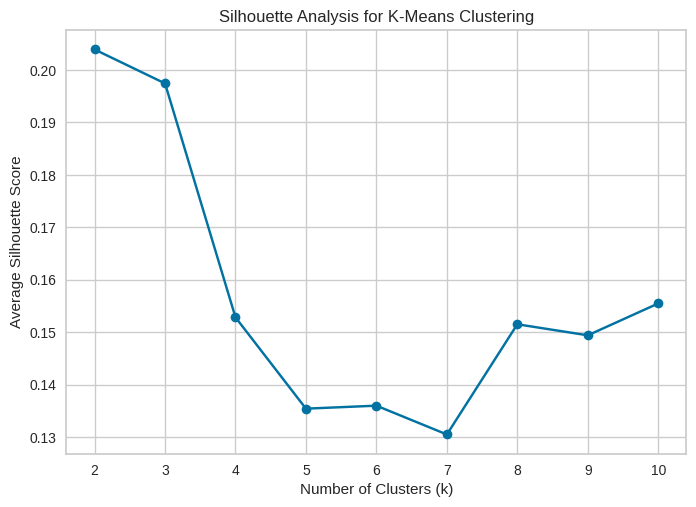

The highest average Silhouette score is 0.2039171500089637 with k=2.
The second highest average Silhouette score is 0.19744443821915328 with k=3.


In [ ]:
# Perform k-means clustering with different values of k (from 2 to 11)
k_values = range(2, 11)
silhouette_avg_values = []

for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init='auto')
    kmeans_result = kmeans.fit_predict(X)  # without target
    silhouette_avg = silhouette_score(X, kmeans_result)  # Calculate silhouette score
    silhouette_avg_values.append(silhouette_avg)

# Find the best number of clusters based on the highest average Silhouette score
best_k = k_values[np.argmax(silhouette_avg_values)]
best_score = max(silhouette_avg_values)

# Find the second highest average Silhouette score and its corresponding number of clusters
silhouette_avg_values_sorted = sorted(silhouette_avg_values, reverse=True)
second_best_score = silhouette_avg_values_sorted[1]
second_best_k = k_values[silhouette_avg_values.index(second_best_score)]

# Plot the silhouette scores for different values of k
plt.plot(k_values, silhouette_avg_values, marker='o')
plt.title('Silhouette Analysis for K-Means Clustering')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Average Silhouette Score')
plt.show()

# Print the best and second best k values based on silhouette score
print(f"The highest average Silhouette score is {best_score} with k={best_k}.")
print(f"The second highest average Silhouette score is {second_best_score} with k={second_best_k}.")


As observed above, the highest average Silhouette score is **0.2039** for **\( K = 2 \)**, indicating that **\( K = 2 \)** is the most optimal choice for our K-means clustering. The second-highest average Silhouette score is **0.1974** for **\( K = 3 \)**, making **\( K = 3 \)** our secondary clustering configuration.  

By considering these two values of **\( K \)**, we aim to analyze different clustering structures, ensuring that we capture meaningful patterns within the dataset and optimize the clustering performance.

#**K=2**

In [ ]:
np.random.seed(8953)

# Perform K-means clustering for K=2
kmeans = KMeans(n_clusters=2, random_state=8953, n_init='auto')  # Set n_init explicitly and init='auto'
kmeans_result = kmeans.fit(X)

# Print the clustering result
print("Cluster Centers:")
print(kmeans_result.cluster_centers_)
print("\nCluster Labels:")
print(kmeans_result.labels_)

Cluster Centers:
[[1.36923077 0.80615385 0.26153846 0.99076923 0.28357569 0.17538462
  0.45846154 0.5067293  0.55384615 0.25990074 1.22769231 1.93846154
  2.55692308]
 [0.94857143 0.64428571 1.25857143 0.84428571 0.26951402 0.13714286
  0.56285714 0.6378735  0.23571429 0.13239631 1.45857143 0.20428571
  2.21571429]]

Cluster Labels:
[0 1 0 ... 0 1 0]


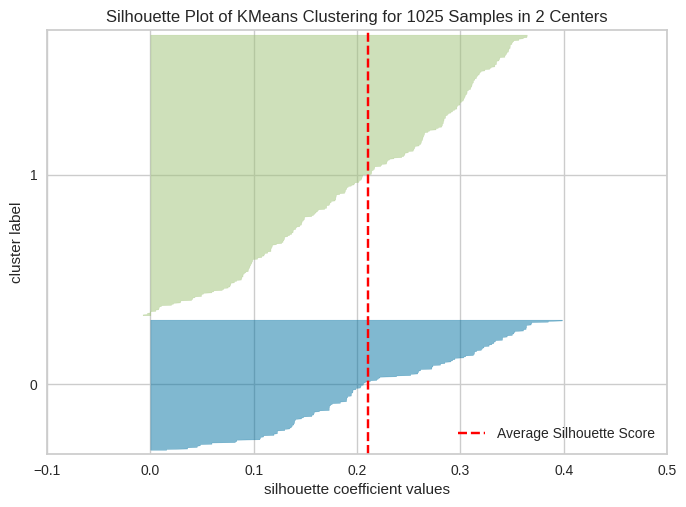

<Axes: title={'center': 'Silhouette Plot of KMeans Clustering for 1025 Samples in 2 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [ ]:

kmeans = KMeans(n_clusters=2,n_init='auto')
visualizer = SilhouetteVisualizer(kmeans, colors='yellowbrick')
visualizer.fit(X)
visualizer.show()


From the **Silhouette Plot of KMeans Clustering for 1025 Samples in 2 Centers**, we observe that most silhouette scores are **positive**, indicating that the majority of data points are well assigned to their respective clusters and maintain a reasonable distance from other clusters. This suggests that the clustering algorithm successfully grouped the data into two distinct clusters, albeit with **moderate separation**.

However, while positive silhouette scores generally indicate good clustering performance, the **average silhouette score of approximately 0.2039** suggests that the separation between clusters is not entirely strong. Some data points, particularly those **near the cluster boundaries**, show silhouette scores close to **zero or even negative values**, indicating potential ambiguity or overlap between clusters.

**Calculating the Within-Cluster Sum of Squares (WSS) and the Average Silhouette Score**

In [ ]:
X_scaled = X

# Perform k-means clustering with k=2
kmeans = KMeans(n_clusters=2, random_state=42, n_init='auto')
kmeans.fit(X_scaled)
labels = kmeans.labels_

# Compute the WSS (Within-Cluster Sum of Squares)
wss = kmeans.inertia_

# Compute the Average Silhouette Score
silhouette_avg = silhouette_score(X, labels)

# Print the evaluation metrics
print("WSS:", wss)
print("Average Silhouette Score:", silhouette_avg)

WSS: 3842.7015172036417
Average Silhouette Score: 0.2039171500089637


The analysis of the **K=2** results is as follows:

- **WSS: 3842.70** – This value suggests that there is some dispersion within the clusters, indicating moderate separation but not highly compact clusters.  
- **Average Silhouette Score: 0.2039** – This relatively low score indicates that the clusters are not perfectly distinct, with some degree of overlap or ambiguity in the clustering structure.  



# **K=3**

In [ ]:
np.random.seed(8953)

# Perform K-means clustering for K=3
kmeans = KMeans(n_clusters=3, random_state=8953, n_init='auto')  # Set n_init explicitly and init='auto'
kmeans_result = kmeans.fit(X)

# Print the clustering result
print("Cluster Centers:")
print(kmeans_result.cluster_centers_)
print("\nCluster Labels:")
print(kmeans_result.labels_)

Cluster Centers:
[[1.385      0.72       0.365      1.08       0.29825342 0.265
  0.435      0.53858779 0.445      0.26822581 1.245      2.525
  2.485     ]
 [0.97357724 0.72764228 0.30487805 0.78252033 0.26637617 0.06504065
  0.55487805 0.58637436 0.41869919 0.15053763 1.40650407 0.30284553
  2.33536585]
 [1.06006006 0.63363363 2.23123123 0.93693694 0.27061308 0.2042042
  0.54954955 0.6455998  0.15015015 0.14845491 1.43843844 0.35735736
  2.21021021]]

Cluster Labels:
[0 1 1 ... 1 1 1]


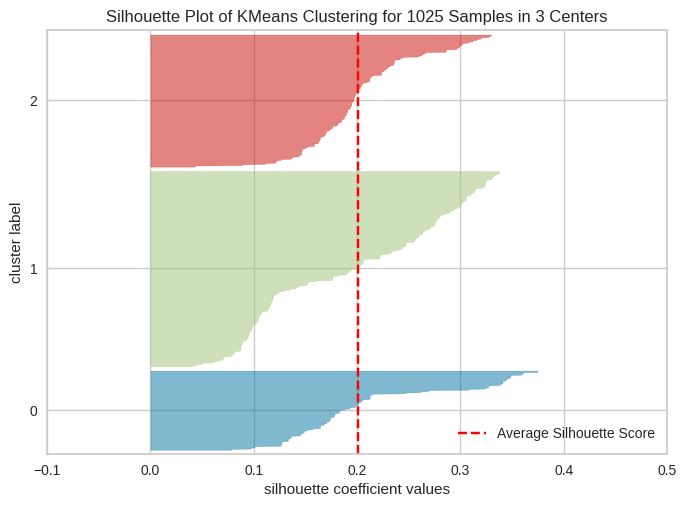

<Axes: title={'center': 'Silhouette Plot of KMeans Clustering for 1025 Samples in 3 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [ ]:

kmeans = KMeans(n_clusters=3,n_init='auto')
visualizer = SilhouetteVisualizer(kmeans, colors='yellowbrick')
visualizer.fit(X)
visualizer.show()

From the graph of **K-Means Clustering for 1025 Samples in 3 Centers**, the fact that most silhouette scores have positive values suggests that the samples are fairly well-matched to their clusters and are generally distant from neighboring clusters. This indicates that the clustering solution has separated the data points into reasonably distinct clusters. However, while some samples have silhouette scores close to zero, indicating slight overlap or ambiguity, there are very few negative scores, suggesting that misclassification is minimal.

Calculating the Within-Cluster Sum of Squares (WSS) and the Average Silhouette Score

In [ ]:
X_scaled = X

# Perform k-means clustering with k=2
kmeans = KMeans(n_clusters=3, random_state=42, n_init='auto')
kmeans.fit(X_scaled)
labels = kmeans.labels_

# Compute the WSS (Within-Cluster Sum of Squares)
wss = kmeans.inertia_

# Compute the Average Silhouette Score
silhouette_avg = silhouette_score(X, labels)

# Print the evaluation metrics
print("WSS:", wss)
print("Average Silhouette Score:", silhouette_avg)

WSS: 3213.0541103450096
Average Silhouette Score: 0.19744443821915328


The analysis of the K=3 results is :

WSS: 3213.05 – The relatively high WSS suggests moderate to weak compactness within clusters, indicating that points within clusters are somewhat dispersed.

Average Silhouette Score: 0.197 – This low silhouette score implies some overlap or ambiguity in cluster assignments, suggesting that the clusters are not perfectly distinct.

# **k=4**

In [ ]:
np.random.seed(8953)

# Perform K-means clustering for K=3
kmeans = KMeans(n_clusters=4, random_state=8953, n_init='auto')  # Set n_init explicitly and init='auto'
kmeans_result = kmeans.fit(X)

# Print the clustering result
print("Cluster Centers:")
print(kmeans_result.cluster_centers_)
print("\nCluster Labels:")
print(kmeans_result.labels_)

Cluster Centers:
[[1.385      0.72       0.365      1.08       0.29825342 0.265
  0.435      0.53858779 0.445      0.26822581 1.245      2.525
  2.485     ]
 [0.70955882 0.70220588 0.47794118 0.49264706 0.24546737 0.04779412
  0.65441176 0.65690952 0.13235294 0.09475806 1.56985294 0.10661765
  2.13235294]
 [1.06006006 0.63363363 2.23123123 0.93693694 0.27061308 0.2042042
  0.54954955 0.6455998  0.15015015 0.14845491 1.43843844 0.35735736
  2.21021021]
 [1.3        0.75909091 0.09090909 1.14090909 0.29222707 0.08636364
  0.43181818 0.49916724 0.77272727 0.21950147 1.20454545 0.54545455
  2.58636364]]

Cluster Labels:
[0 3 3 ... 3 1 1]


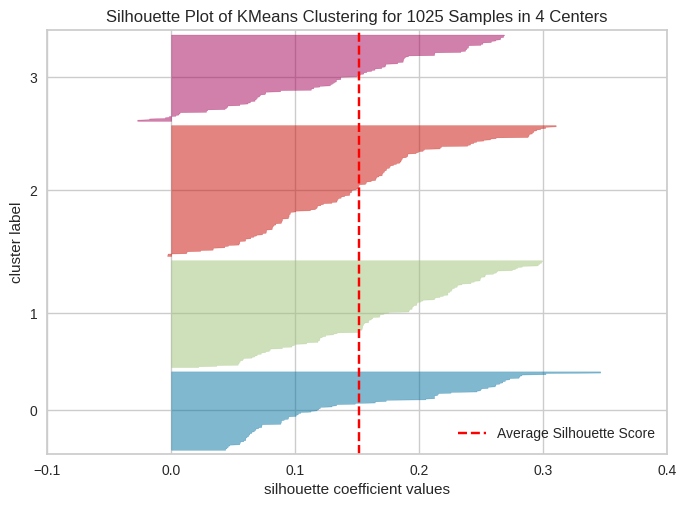

<Axes: title={'center': 'Silhouette Plot of KMeans Clustering for 1025 Samples in 4 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [ ]:

kmeans = KMeans(n_clusters=4,n_init='auto')
visualizer = SilhouetteVisualizer(kmeans, colors='yellowbrick')
visualizer.fit(X)
visualizer.show()

From the graph of **K-Means Clustering for 1025 Samples in 4 Centers**, the fact that most silhouette scores have positive values suggests that the samples are fairly well-matched to their clusters and are generally distant from neighboring clusters. This indicates that the clustering solution has separated the data points into reasonably distinct clusters.

However, while some samples have silhouette scores close to zero, indicating slight overlap or ambiguity, there are very few negative scores.

Calculating the Within-Cluster Sum of Squares (WSS) and the Average Silhouette Score

In [ ]:
X_scaled = X

# Perform k-means clustering with k=2
kmeans = KMeans(n_clusters=4, random_state=42, n_init='auto')
kmeans.fit(X_scaled)
labels = kmeans.labels_

# Compute the WSS (Within-Cluster Sum of Squares)
wss = kmeans.inertia_

# Compute the Average Silhouette Score
silhouette_avg = silhouette_score(X, labels)

# Print the evaluation metrics
print("WSS:", wss)
print("Average Silhouette Score:", silhouette_avg)

WSS: 2971.100555994478
Average Silhouette Score: 0.1528536239200623


The analysis of the K=4 results is :
WSS: 2971.10 – The moderate WSS suggests that the clusters have a somewhat weak compactness, with points being a bit dispersed within them.

Average Silhouette Score: 0.1529 – The low silhouette score indicates that there is some overlap or ambiguity in the clusters, meaning they are not very distinct.

**Comparing the Results of the Three Clustering Configurations:**



1.   WSS = 3842.70, Silhouette Score = 0.2039
Analysis: This configuration has the highest silhouette score, suggesting that the clusters are somewhat well-separated. However, the WSS is the highest, indicating that the clusters are the least compact.

2.   WSS = 3213.05, Silhouette Score = 0.1974
Analysis: The WSS is lower than when K=2, suggesting slightly more compact clusters. However, the silhouette score is lower, implying less distinct separation between the clusters.



3.   WSS = 2971.10, Silhouette Score = 0.1529
Analysis: This configuration has the lowest WSS, indicating the most compact clusters. However, it also has the lowest silhouette score, suggesting significant overlap or ambiguity in the cluster assignments, meaning the clusters are not very distinct.







**Conclusion**

The first configuration (K=2, WSS = 3842.70, Silhouette Score = 0.2039) is the best overall. Despite having the highest WSS, it achieves the highest silhouette score, suggesting better-separated clusters. This trade-off indicates that the clusters are more distinct compared to the other configurations, offering a clearer separation of data points.

# **Final Choice:**

**Summary of Results**


|                       | k=2       | k=3          | k=4           |
|--------------- |----------|------------|-------------|
|    WSS            | *3842.70*   | *3213.05*| *2971.10*|
| Average Silhouette Score                      | *0.2039*| *0.1974*| *0.1529*|

Based on the metrics we've analyzed, including WSS (Within-Cluster Sum of Squares) and the average Silhouette score, we have determined that K = 2 is the most suitable choice for our clustering model. This decision is supported by the fact that K = 2 provides the highest Silhouette score among the tested values, indicating better-defined clusters with higher cohesion and separation compared to K = 3 and K = 4. Although K = 2 has the largest WSS value, which typically decreases as K increases, the higher Silhouette score suggests that K = 2 strikes the best balance between separation and compactness of the clusters.